In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [2]:
fig_size= 8

# PIB dans la santé

### Extraction des données

In [3]:
df = pd.read_csv(r"pib_sante.csv", delimiter=',')
df

HF            RΘgime de financement     HC  \
0    HFTOT  Tous les régimes de financement  HCTOT   
1    HFTOT  Tous les régimes de financement  HCTOT   
2    HFTOT  Tous les régimes de financement  HCTOT   
3    HFTOT  Tous les régimes de financement  HCTOT   
4    HFTOT  Tous les régimes de financement  HCTOT   
..     ...                              ...    ...   
453  HFTOT  Tous les régimes de financement  HCTOT   
454  HFTOT  Tous les régimes de financement  HCTOT   
455  HFTOT  Tous les régimes de financement  HCTOT   
456  HFTOT  Tous les régimes de financement  HCTOT   
457  HFTOT  Tous les régimes de financement  HCTOT   

                                              Fonction     HP  \
0    Dépenses courantes de santé (toutes les foncti...  HPTOT   
1    Dépenses courantes de santé (toutes les foncti...  HPTOT   
2    Dépenses courantes de santé (toutes les foncti...  HPTOT   
3    Dépenses courantes de santé (toutes les foncti...  HPTOT   
4    Dépenses courantes de santé (toutes les foncti...  HPTOT   
..                                                 ...    ...   
453  Dépenses courantes de santé (toutes les foncti...  HPTOT   
454  Dépenses courantes de santé (toutes les foncti...  HPTOT   
455  Dépenses courantes de santé (toutes les foncti...  HPTOT   
456  Dépenses courantes de santé (toutes les foncti...  HPTOT   
457  Dépenses courantes de santé (toutes les foncti...  HPTOT   

               Prestataire MEASURE                                 Mesure  \
0    Tous les prestataires  PARPIB  Pourcentage du produit intérieur brut   
1    Tous les prestataires  PARPIB  Pourcentage du produit intérieur brut   
2    Tous les prestataires  PARPIB  Pourcentage du produit intérieur brut   
3    Tous les prestataires  PARPIB  Pourcentage du produit intérieur brut   
4    Tous les prestataires  PARPIB  Pourcentage du produit intérieur brut   
..                     ...     ...                                    ...   
453  Tous les prestataires  PARPIB  Pourcentage du produit intérieur brut   
454  Tous les prestataires  PARPIB  Pourcentage du produit intérieur brut   
455  Tous les prestataires  PARPIB  Pourcentage du produit intérieur brut   
456  Tous les prestataires  PARPIB  Pourcentage du produit intérieur brut   
457  Tous les prestataires  PARPIB  Pourcentage du produit intérieur brut   

    LOCATION              Pays  ...  AnnΘe  Unit Code         Unit  \
0        NZL  Nouvelle-Zélande  ...   2010         PC  Pourcentage   
1        NZL  Nouvelle-Zélande  ...   2011         PC  Pourcentage   
2        NZL  Nouvelle-Zélande  ...   2012         PC  Pourcentage   
3        NZL  Nouvelle-Zélande  ...   2013         PC  Pourcentage   
4        NZL  Nouvelle-Zélande  ...   2014         PC  Pourcentage   
..       ...               ...  ...    ...        ...          ...   
453      TUR           Turquie  ...   2015         PC  Pourcentage   
454      TUR           Turquie  ...   2016         PC  Pourcentage   
455      TUR           Turquie  ...   2017         PC  Pourcentage   
456      TUR           Turquie  ...   2018         PC  Pourcentage   
457      TUR           Turquie  ...   2019         PC  Pourcentage   

    PowerCode Code  PowerCode Reference Period Code  Reference Period  Value  \
0                0     Unités                   NaN               NaN  9.593   
1                0     Unités                   NaN               NaN  9.520   
2                0     Unités                   NaN               NaN  9.652   
3                0     Unités                   NaN               NaN  9.360   
4                0     Unités                   NaN               NaN  9.402   
..             ...        ...                   ...               ...    ...   
453              0     Unités                   NaN               NaN  4.117   
454              0     Unités                   NaN               NaN  4.285   
455              0     Unités                   NaN               NaN  4.180   
456         

In [4]:
pib = df[['Pays','AnnΘe','Value']]
pib

Pays  AnnΘe  Value
0    Nouvelle-Zélande   2010  9.593
1    Nouvelle-Zélande   2011  9.520
2    Nouvelle-Zélande   2012  9.652
3    Nouvelle-Zélande   2013  9.360
4    Nouvelle-Zélande   2014  9.402
..                ...    ...    ...
453           Turquie   2015  4.117
454           Turquie   2016  4.285
455           Turquie   2017  4.180
456           Turquie   2018  4.124
457           Turquie   2019  4.344

[458 rows x 3 columns]

In [5]:
pib_T = pd.pivot_table(pib,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pibT = pib_T.T

pibT

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
AnnΘe                                                                     
2010            7.415     11.096      8.431    10.221    10.233   7.945   
2011            7.497     10.778      8.542    10.026    10.392   7.788   
2012            7.753     10.853      8.676    10.199    10.507   7.736   
2013            7.721     10.998      8.761    10.286    10.561   7.977   
2014            7.930     11.022      9.036    10.368    10.594   8.396   
2015            8.201     11.184      9.328    10.368    10.431   8.909   
2016            8.096     11.236      9.248    10.352    10.773   9.169   
2017            8.113     11.329      9.267    10.385    10.785   9.471   
2018            8.253     11.450      9.155    10.318    10.764   9.465   
2019            0.000     11.697      9.418    10.434    10.659   9.591   
2020            0.000     12.530      0.000    11.498     0.000   0.000   

Pays   Canada  Chili  Chine (République populaire de)  Colombie  ...  \
AnnΘe                                                            ...   
2010   10.696  6.775                            4.194     7.071  ...   
2011   10.401  6.772                            4.309     6.781  ...   
2012   10.506  7.021                            4.570     6.746  ...   
2013   10.405  7.445                            4.742     7.017  ...   
2014   10.249  7.807                            4.800     7.186  ...   
2015   10.733  8.303                            4.961     7.523  ...   
2016   11.023  8.519                            4.977     7.531  ...   
2017   10.835  9.069                            5.047     7.679  ...   
2018   10.806  9.159                            5.148     7.625  ...   
2019   10.844  9.333                            0.000     7.709  ...   
2020    0.000  9.365                            0.000     0.000  ...   

Pays   Portugal  Royaume-Uni  Russie  République slovaque  République tchèque  \
AnnΘe                                                                           
2010     10.033        9.835   4.959                7.731               6.875   
2011      9.731        9.848   4.795                7.348               6.928   
2012      9.654        9.914   4.936                7.543               6.979   
2013      9.405        9.976   5.081                7.500               7.722   
2014      9.343        9.950   5.182                6.892               7.597   
2015      9.316        9.901   5.296                6.793               7.196   
2016      9.394        9.873   5.290                6.991               7.107   
2017      9.306        9.808   5.359                6.771               7.142   
2018      9.413        9.904   5.316                6.705               7.525   
2019      9.531       10.154   5.607                6.959               7.835   
2020     10.116       12.754   0.000                7.732               9.068   

Pays   Slovénie  Suisse   Suède  Turquie  États-Unis  
AnnΘe                                                 
2010      8.565   9.942   8.320    5.021      16.259  
2011      8.536  10.019  10.416    4.653      16.199  
2012      8.715  10.249  10.735    4.444      16.175  
2013      8.740  10.462  10.905    4.371      16.065  
2014      8.502  10.616  10.948    4.325      16.253  
2015      8.517  11.008  10.804    4.117      16.524  
2016      8.478  11.300  10.852    4.285      16.844  
2017      8.185  11.481  10.785    4.180      16.806  
2018      8.279  11.151  10.941    4.124      16.687  
2019      8.524  11.291  10.921    4.344      16.767  
2020      9.715   0.000  11.447    0.000       0.000  

[11 rows x 44 columns]

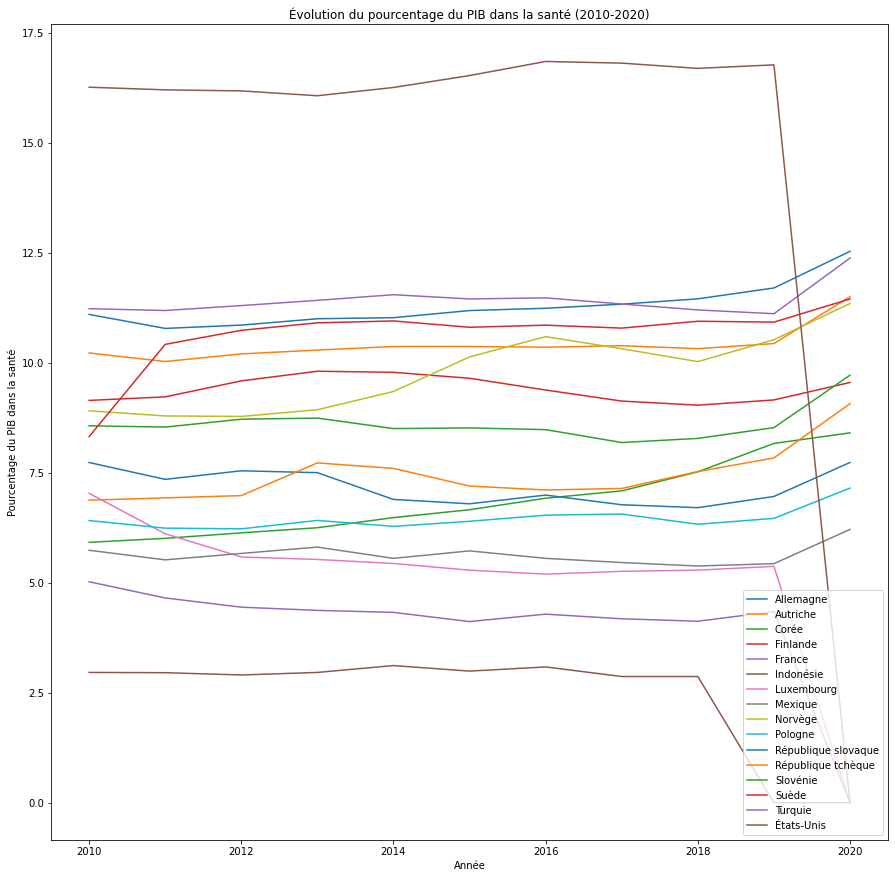

In [6]:
testpib = pibT
testpib = testpib.drop(['Afrique du Sud', 'Australie','Belgique','Brésil','Canada','Chine (République populaire de)','Colombie',
             'Espagne','Russie','Grèce','Hongrie','Inde','Costa Rica','Israël','Irlande','Lituanie','Lettonie',
             'Suisse','Japon','Danemark','Italie','Chili','Nouvelle-Zélande','Islande','Pays-Bas','Portugal','Royaume-Uni',
              'Estonie'], axis=1)
testpib.plot(figsize=(15, 15))
plt.xlabel("Année")
plt.ylabel("Pourcentage du PIB dans la santé")
plt.title("Évolution du pourcentage du PIB dans la santé (2010-2020)")
plt.legend(loc='lower right')
plt.savefig("img/Évolution du pourcentage du PIB dans la santé tri (2010-2020).png")
plt.show()

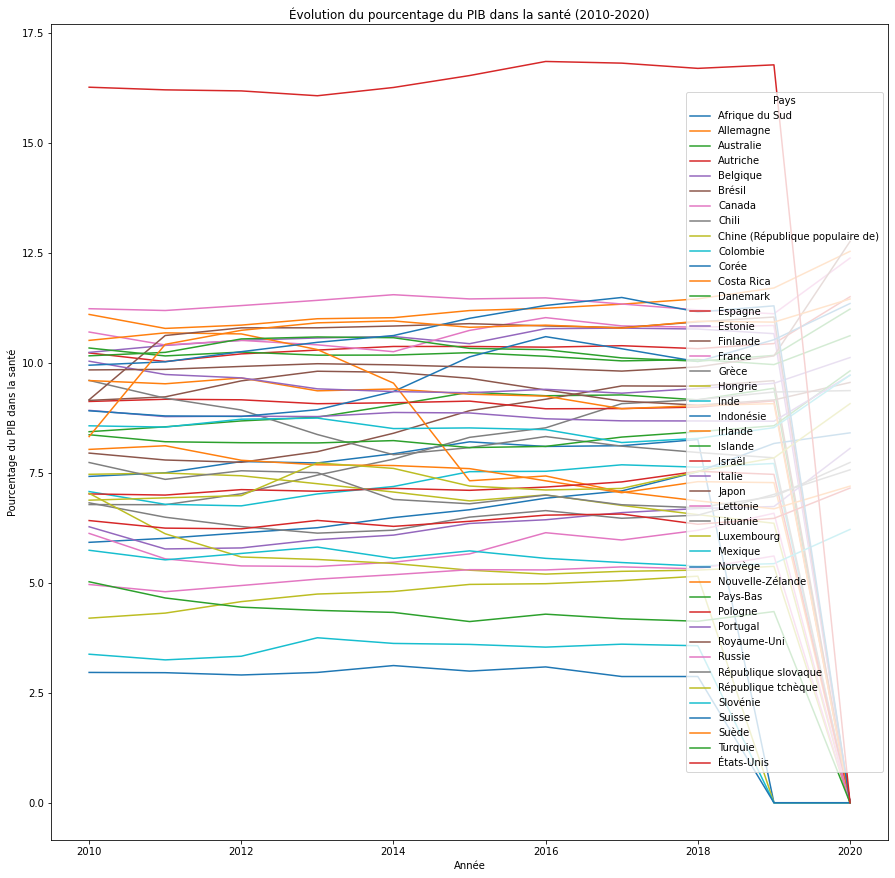

AnnΘe
2010    8.176727
2011    8.135591
2012    8.184205
2013    8.228818
2014    8.235432
2015    8.261023
2016    8.325545
2017    8.284932
2018    8.298727
2019    7.962364
2020    4.850727
dtype: float64

In [7]:
pibT.plot(figsize=(15, 15))
plt.xlabel("Année")
plt.ylabel("Pourcentage du PIB dans la santé")
plt.title("Évolution du pourcentage du PIB dans la santé (2010-2020)")
plt.savefig("img/Évolution du pourcentage du PIB dans la santé (2010-2020).png")
plt.show()
pibT.mean(axis=1)

# Espérance de vie 

In [8]:
### Année qu'on veut récupérer
Annee0 = 2010
Annee1 = 2018

pib_annee0 = pib.loc[pib['AnnΘe'] == Annee0]
pib_annee1 = pib.loc[pib['AnnΘe'] == Annee1]

pib_annee0 = pd.pivot_table(pib_annee0,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee0T = pib_annee0.T

pib_annee1 = pd.pivot_table(pib_annee1,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee1T = pib_annee1.T

### Extraction des données

In [9]:
df = pd.read_csv(r"esperance_de_vie.csv", delimiter=',')
df

VAR                          Variable      UNIT  Mesure  COU  \
0    EVIETOTA  Population totale à la naissance  EVIDUREV  Années  AUS   
1    EVIETOTA  Population totale à la naissance  EVIDUREV  Années  AUS   
2    EVIETOTA  Population totale à la naissance  EVIDUREV  Années  AUS   
3    EVIETOTA  Population totale à la naissance  EVIDUREV  Années  AUS   
4    EVIETOTA  Population totale à la naissance  EVIDUREV  Années  AUS   
..        ...                               ...       ...     ...  ...   
904  EVIETOTA  Population totale à la naissance  EVIDUREV  Années  COL   
905  EVIETOTA  Population totale à la naissance  EVIDUREV  Années  COL   
906  EVIETOTA  Population totale à la naissance  EVIDUREV  Années  COL   
907  EVIETOTA  Population totale à la naissance  EVIDUREV  Années  COL   
908  EVIETOTA  Population totale à la naissance  EVIDUREV  Années  COL   

          Pays   YEA  Année  Value Flag Codes Flags  
0    Australie  2000   2000   79.3        NaN   NaN  
1    Australie  2001   2001   79.7        NaN   NaN  
2    Australie  2002   2002   80.0        NaN   NaN  
3    Australie  2003   2003   80.3        NaN   NaN  
4    Australie  2004   2004   80.6        NaN   NaN  
..         ...   ...    ...    ...        ...   ...  
904   Colombie  2016   2016   75.8        NaN   NaN  
905   Colombie  2017   2017   76.0        NaN   NaN  
906   Colombie  2018   2018   76.5        NaN   NaN  
907   Colombie  2019   2019   76.7        NaN   NaN  
908   Colombie  2020   2020   76.8        NaN   NaN  

[909 rows x 11 columns]

In [10]:
esperance = df[['Pays','Année','Value']]
esperance_annee0 = esperance.loc[esperance['Année'] == Annee0]
esperance_annee1 = esperance.loc[esperance['Année'] == Annee1]
esperance

Pays  Année  Value
0    Australie   2000   79.3
1    Australie   2001   79.7
2    Australie   2002   80.0
3    Australie   2003   80.3
4    Australie   2004   80.6
..         ...    ...    ...
904   Colombie   2016   75.8
905   Colombie   2017   76.0
906   Colombie   2018   76.5
907   Colombie   2019   76.7
908   Colombie   2020   76.8

[909 rows x 3 columns]

In [11]:
esperance_T = pd.pivot_table(esperance,index='Pays',columns='Année',values='Value', fill_value=0)
esperanceT = esperance_T.T

esperance_annee0 = pd.pivot_table(esperance_annee0,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee0T = esperance_annee0.T

esperance_annee1 = pd.pivot_table(esperance_annee1,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee1T = esperance_annee1.T

esperanceT

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2000             56.2       78.2       79.3      78.2      77.8    70.2   
2001             55.2       78.5       79.7      78.7      78.1    70.6   
2002             54.4       78.5       80.0      78.8      78.2    70.9   
2003             53.8       78.6       80.3      78.7      78.2    71.3   
2004             53.5       79.2       80.6      79.3      79.0    71.6   
2005             53.5       79.4       80.9      79.4      79.1    72.0   
2006             53.9       79.8       81.1      80.0      79.5    72.3   
2007             54.5       80.1       81.4      80.3      79.9    72.7   
2008             55.4       80.2       81.5      80.5      79.8    73.0   
2009             56.5       80.3       81.6      80.4      80.1    73.4   
2010             57.7       80.5       81.8      80.7      80.3    73.7   
2011             59.0       80.5       82.0      81.1      80.7    74.0   
2012             60.1       80.6       82.1      81.0      80.5    74.2   
2013             61.2       80.6       82.2      81.2      80.7    74.5   
2014             62.0       81.2       82.4      81.6      81.4    74.8   
2015             62.7       80.7       82.5      81.3      81.1    75.0   
2016             63.2       81.1       82.5      81.7      81.5    75.3   
2017             63.6       81.1       82.6      81.7      81.6    75.5   
2018             63.9       81.0       82.8      81.8      81.7    75.7   
2019             64.2       81.4       83.0      82.0      82.1    75.9   
2020              0.0       81.1        0.0      81.3      80.9     0.0   

Pays   Canada  Chili  Chine (République populaire de)  Colombie  ...  \
Année                                                            ...   
2000     79.0   76.4                             71.5      71.0  ...   
2001     79.2   76.7                             71.8      71.5  ...   
2002     79.4   77.0                             72.2      71.9  ...   
2003     79.6   77.2                             72.5      72.3  ...   
2004     79.8   77.4                             72.8      72.7  ...   
2005     80.0   77.7                             73.1      73.1  ...   
2006     80.3   77.9                             73.4      73.3  ...   
2007     80.4   78.1                             73.6      73.6  ...   
2008     80.6   78.3                             73.9      73.9  ...   
2009     80.8   78.6                             74.2      74.1  ...   
2010     81.1   78.8                             74.5      74.3  ...   
2011     81.3   79.0                             74.8      74.6  ...   
2012     81.5   79.2                             75.1      74.8  ...   
2013     81.7   79.4                             75.4      75.1  ...   
2014     81.8   79.6                             75.7      75.3  ...   
2015     81.9   79.8                             76.0      75.5  ...   
2016     82.0   80.0                             76.3      75.8  ...   
2017     82.0   80.2                             76.6      76.0  ...   
2018     82.0   80.4                             76.8      76.5  ...   
2019     82.1   80.6                             77.0      76.7  ...   
2020     81.7    0.0                              0.0      76.8  ...   

Pays   Portugal  Royaume-Uni  Russie  République slovaque  République tchèque  \
Année                                                                           
2000       76.9         77.9    65.6                 73.4                75.1   
2001       77.2         78.2    65.5                 73.6                75.3   
2002       77.4         78.3    65.3                 73.8                75.4   
2003       77.5         78.4    65.2                 73.8                75.3   
2004       78.4         79.0    65.6                 74.2                75.8   
2005       78.2         79.2    65.7              

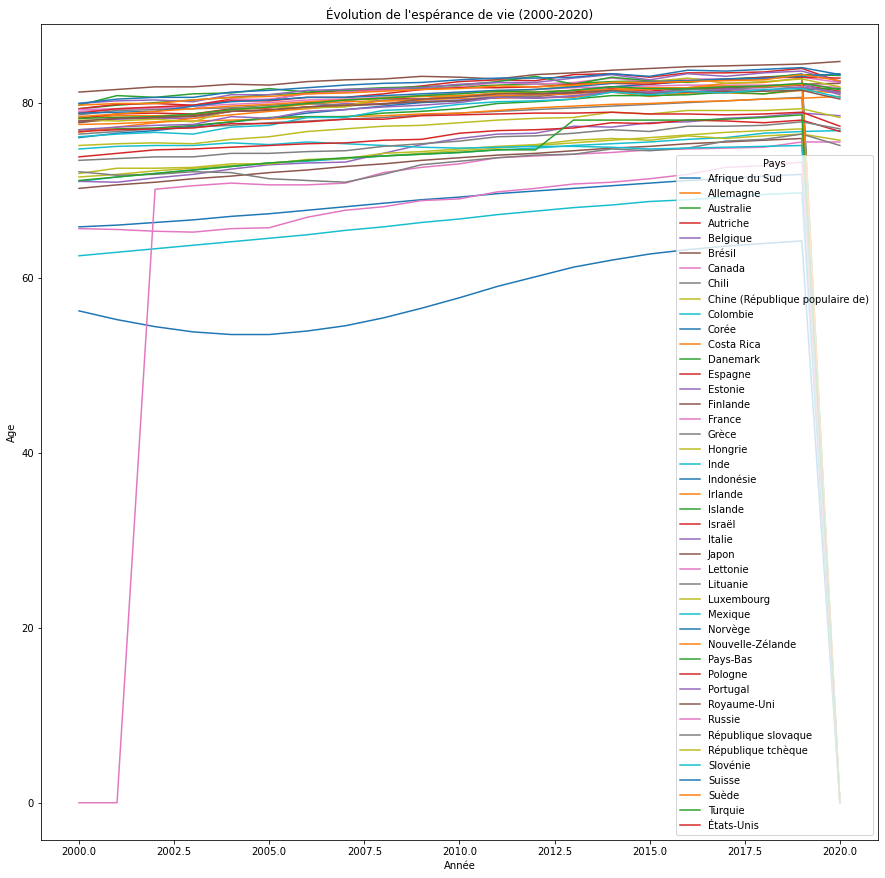

In [12]:
esperanceT.plot(figsize=(15, 15))
plt.xlabel("Année")
plt.ylabel("Age")
plt.title("Évolution de l'espérance de vie (2000-2020)")
plt.savefig("img/Évolution de l'espérance de vie (2000-2020).png")
plt.show()

### Traitement (regression linéaire, clustering, ...)

#### Espérance de vie en fonction du PIB

In [13]:
esperance_annee0T

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2010             57.7       80.5       81.8      80.7      80.3    73.7   

Pays   Canada  Chili  Chine (République populaire de)  Colombie  ...  \
Année                                                            ...   
2010     81.1   78.8                             74.5      74.3  ...   

Pays   Portugal  Royaume-Uni  Russie  République slovaque  République tchèque  \
Année                                                                           
2010       80.0         80.6    69.0                 75.6                77.7   

Pays   Slovénie  Suisse  Suède  Turquie  États-Unis  
Année                                                
2010       79.8    82.6   81.6     74.3        78.6  

[1 rows x 44 columns]

In [14]:
esperance_annee1T

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2018             63.9       81.0       82.8      81.8      81.7    75.7   

Pays   Canada  Chili  Chine (République populaire de)  Colombie  ...  \
Année                                                            ...   
2018     82.0   80.4                             76.8      76.5  ...   

Pays   Portugal  Royaume-Uni  Russie  République slovaque  République tchèque  \
Année                                                                           
2018       81.4         81.3    72.8                 77.4                79.1   

Pays   Slovénie  Suisse  Suède  Turquie  États-Unis  
Année                                                
2018       81.5    83.8   82.6     78.3        78.7  

[1 rows x 44 columns]

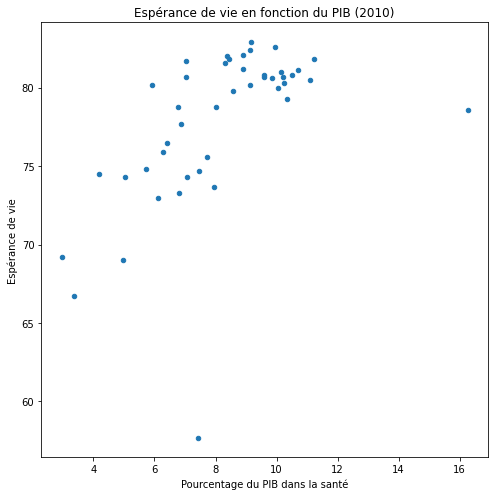

In [15]:
pib_esperance0 = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee0T.iloc[0],
   'Espérance de vie': esperance_annee0T.iloc[0]
   })

pib_esperance0.plot.scatter(x='Pourcentage du PIB dans la santé', y='Espérance de vie', figsize=(fig_size, fig_size))
plt.title('Espérance de vie en fonction du PIB (%d)' % Annee0)
plt.savefig("img/Espérance de vie en fonction du PIB (%d).png" % Annee0)
plt.show()

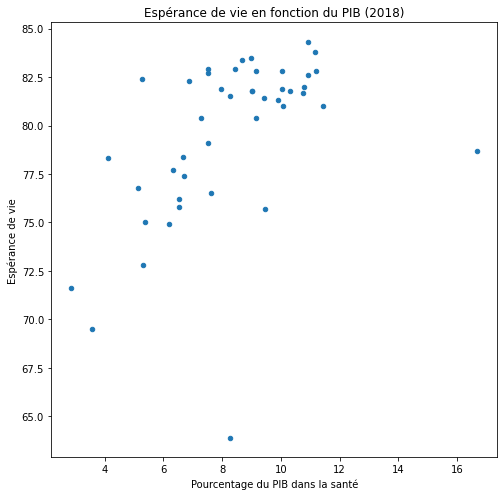

In [16]:
pib_esperance1 = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee1T.iloc[0],
   'Espérance de vie': esperance_annee1T.iloc[0]
   })

pib_esperance1.plot.scatter(x='Pourcentage du PIB dans la santé', y='Espérance de vie', figsize=(fig_size, fig_size))
plt.title('Espérance de vie en fonction du PIB (%d)' % Annee1)
plt.savefig("img/Espérance de vie en fonction du PIB (%d).png" % Annee1)
plt.show()

#### Regression Line - Taux de mortalité évitable par prévention en fonction de l'espérance de vie

In [17]:
X = pib_annee1T.iloc[0].values.reshape(-1,1)
Y = esperance_annee1T.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

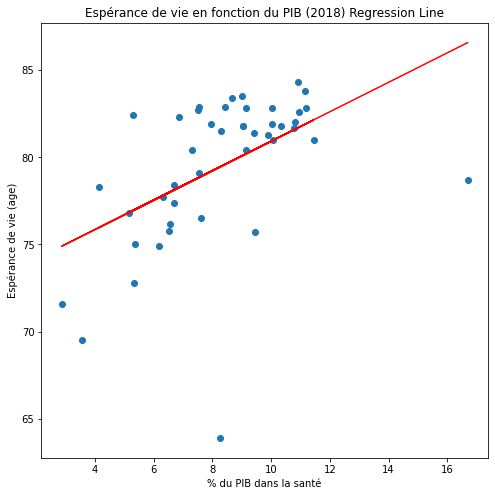

In [18]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("% du PIB dans la santé")
plt.ylabel("Espérance de vie (age)")
plt.title('Espérance de vie en fonction du PIB (%d) Regression Line' % Annee1)
plt.savefig("img/Espérance de vie en fonction du PIB (%d) Regression Line.png" % Annee1)
plt.show()

In [19]:
lr.score(X,Y)

0.2524219195330919

#### Clustering - Taux de mortalité évitable par prévention en fonction de l'espérance de vie

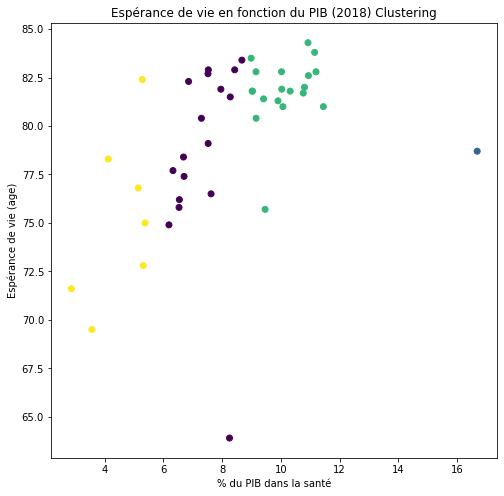

In [20]:
y_pred = KMeans(n_clusters=4, random_state=0).fit_predict(X)
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y, c=y_pred)
plt.xlabel("% du PIB dans la santé")
plt.ylabel("Espérance de vie (age)")
plt.title('Espérance de vie en fonction du PIB (%d) Clustering' % Annee1)
plt.savefig("img/Espérance de vie en fonction du PIB (%d) Clustering.png" % Annee1)
plt.show()

# Mortalité évitable prévention vs Mortalité évitable traitement

Quel est le meilleur modèle? un modèle basé sur la prévention ou le traitement? Voir l'impact de la prévention sur la mortalité

## Mortalité évitable prévention

In [21]:
### Année qu'on veut récupérer
Annee0 = 2010
Annee1 = 2014

pib_annee0 = pib.loc[pib['AnnΘe'] == Annee0]
pib_annee1 = pib.loc[pib['AnnΘe'] == Annee1]

esperance_annee0 = esperance.loc[esperance['Année'] == Annee0]
esperance_annee1 = esperance.loc[esperance['Année'] == Annee1]

pib_annee0 = pd.pivot_table(pib_annee0,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee0T = pib_annee0.T

pib_annee1 = pd.pivot_table(pib_annee1,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee1T = pib_annee1.T

esperance_annee0 = pd.pivot_table(esperance_annee0,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee0T = esperance_annee0.T

esperance_annee1 = pd.pivot_table(esperance_annee1,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee1T = esperance_annee1.T

### Extraction des données

In [22]:
df = pd.read_csv(r"mortalite_evitable_prevention.csv", delimiter=',')
df

VAR                                  Variable      UNIT  \
0    AVDMPRVM  Mortalité évitable grâce à la prévention  TXCMILTX   
1    AVDMPRVM  Mortalité évitable grâce à la prévention  TXCMILTX   
2    AVDMPRVM  Mortalité évitable grâce à la prévention  TXCMILTX   
3    AVDMPRVM  Mortalité évitable grâce à la prévention  TXCMILTX   
4    AVDMPRVM  Mortalité évitable grâce à la prévention  TXCMILTX   
..        ...                                       ...       ...   
693  AVDMPRVM  Mortalité évitable grâce à la prévention  TXCMILTX   
694  AVDMPRVM  Mortalité évitable grâce à la prévention  TXCMILTX   
695  AVDMPRVM  Mortalité évitable grâce à la prévention  TXCMILTX   
696  AVDMPRVM  Mortalité évitable grâce à la prévention  TXCMILTX   
697  AVDMPRVM  Mortalité évitable grâce à la prévention  TXCMILTX   

                                               Mesure  COU    Pays   YEA  \
0    Décès pour 100 000 personnes (taux standardisés)  BRA  Brésil  2000   
1    Décès pour 100 000 personnes (taux standardisés)  BRA  Brésil  2001   
2    Décès pour 100 000 personnes (taux standardisés)  BRA  Brésil  2002   
3    Décès pour 100 000 personnes (taux standardisés)  BRA  Brésil  2003   
4    Décès pour 100 000 personnes (taux standardisés)  BRA  Brésil  2004   
..                                                ...  ...     ...   ...   
693  Décès pour 100 000 personnes (taux standardisés)  GRC   Grèce  2014   
694  Décès pour 100 000 personnes (taux standardisés)  GRC   Grèce  2015   
695  Décès pour 100 000 personnes (taux standardisés)  GRC   Grèce  2016   
696  Décès pour 100 000 personnes (taux standardisés)  GRC   Grèce  2017   
697  Décès pour 100 000 personnes (taux standardisés)  GRC   Grèce  2018   

     Année  Value Flag Codes Flags  
0     2000    230        NaN   NaN  
1     2001    224        NaN   NaN  
2     2002    223        NaN   NaN  
3     2003    222        NaN   NaN  
4     2004    222        NaN   NaN  
..     ...    ...        ...   ...  
693   2014    113        NaN   NaN  
694   2015    117        NaN   NaN  
695   2016    113        NaN   NaN  
696   2017    111        NaN   NaN  
697   2018    110        NaN   NaN  

[698 rows x 11 columns]

In [23]:
mortalite_prevention = df[['Pays','Année','Value']]
mortalite_prevention_annee0 = mortalite_prevention.loc[mortalite_prevention['Année'] == Annee0]
mortalite_prevention_annee1 = mortalite_prevention.loc[mortalite_prevention['Année'] == Annee1]
mortalite_prevention

Pays  Année  Value
0    Brésil   2000    230
1    Brésil   2001    224
2    Brésil   2002    223
3    Brésil   2003    222
4    Brésil   2004    222
..      ...    ...    ...
693   Grèce   2014    113
694   Grèce   2015    117
695   Grèce   2016    113
696   Grèce   2017    111
697   Grèce   2018    110

[698 rows x 3 columns]

In [24]:
mortalite_prevention = pd.pivot_table(mortalite_prevention,index='Pays',columns='Année',values='Value', fill_value=0)
mortalite_preventionT = mortalite_prevention.T

mortalite_prevention_annee0 = pd.pivot_table(mortalite_prevention_annee0,index='Pays',columns='Année',values='Value', fill_value=0)
mortalite_prevention_annee0T = mortalite_prevention_annee0.T

mortalite_prevention_annee1 = pd.pivot_table(mortalite_prevention_annee1,index='Pays',columns='Année',values='Value', fill_value=0)
mortalite_prevention_annee1T = mortalite_prevention_annee1.T

mortalite_preventionT

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2000              435        163        138         0       170     230   
2001              447        156        132         0       168     224   
2002              464        155        127       162       161     223   
2003              486        153        120       162       157     222   
2004              482        145        117       155       149     222   
2005              485        141          0       152       151     216   
2006              496        135        111       145       144     217   
2007              486        131        108       142       143     215   
2008              475        129        109       137       144     216   
2009              449        127        107       139       140     214   
2010              429        125        103       135       138     214   
2011              395        124        102       131       135     213   
2012              377        122         98       131       132     210   
2013              367        124         99       127       129     208   
2014              358        120        100       124       124     204   
2015              355        122        101       127       124     199   
2016                0        120         97       122       119     197   
2017                0        118         96       118         0     192   
2018                0        118         93       119         0     185   
2019                0        113          0       115         0     176   

Pays   Canada  Chili  Colombie  Corée  ...  Pologne  Portugal  Royaume-Uni  \
Année                                  ...                                   
2000      150    190       262    240  ...      246         0            0   
2001      147    194       259    230  ...      236         0          161   
2002      145    189       254    228  ...      230       167          157   
2003      143    186       234    222  ...      228       161          154   
2004      139    179       223    211  ...      225         0          147   
2005      138    170       204    199  ...      222         0          144   
2006      133    165       201    185  ...      220         0          141   
2007      134    159       191    176  ...      220       129          138   
2008      131    155       188    166  ...      216       125          137   
2009      127    155       182    161  ...      207       125          131   
2010      125    155       174    155  ...      198       120          128   
2011      122    145       161    146  ...      193       118          125   
2012      121    142       159    138  ...      190       112          120   
2013      119    139       154    131  ...      183       111          121   
2014      119    137       149    124  ...      174       113          119   
2015      117    135       147    117  ...      172       111          120   
2016      115    130       147    111  ...      169       110          119   
2017      116    123       143    104  ...      170       109            0   
2018        0    116         0    100  ...      169       109            0   
2019        0      0         0     97  ...        0         0            0   

Pays   République slovaque  République tchèque  Slovénie  Suisse  Suède  \
Année                                                                     
2000                   278                 233       226     132    129   
2001                   270                 223       224     126    129   
2002                   260                 219       214     121    127   
2003                   257                 219       211     118    124   
2004                   248                 210       197     113    126   
2005                   248                 204       185     114    120   
2006                   244      

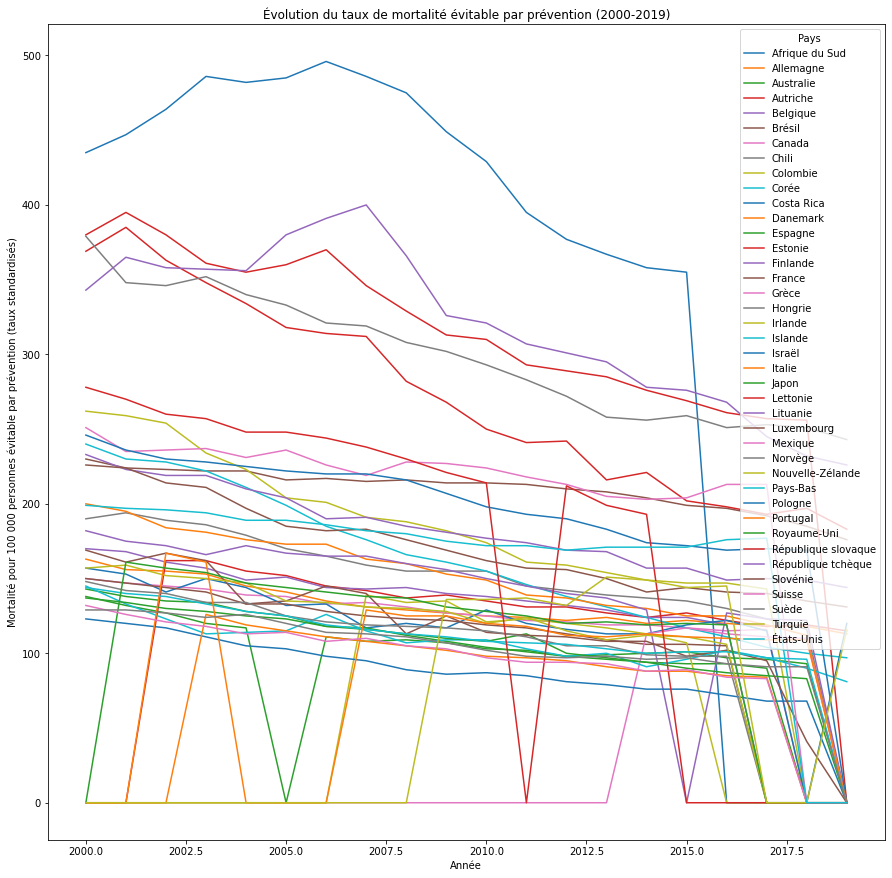

In [25]:
mortalite_preventionT.plot(figsize=(15, 15))
plt.xlabel("Année")
plt.ylabel("Mortalité pour 100 000 personnes évitable par prévention (taux standardisés)")
plt.title("Évolution du taux de mortalité évitable par prévention (2000-2019)")
plt.savefig("img/Évolution du taux de mortalité évitable par prévention (2000-2019).png")
plt.show()

### Traitement (regression linéaire, clustering, ...)

#### Taux de mortalité évitable par prévention en fonction du PIB

In [26]:
mortalite_prevention_annee0T

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2010              429        125        103       135       138     214   

Pays   Canada  Chili  Colombie  Corée  ...  Pologne  Portugal  Royaume-Uni  \
Année                                  ...                                   
2010      125    155       174    155  ...      198       120          128   

Pays   République slovaque  République tchèque  Slovénie  Suisse  Suède  \
Année                                                                     
2010                   214                 177       162      97    102   

Pays   Turquie  États-Unis  
Année                       
2010       136         172  

[1 rows x 39 columns]

In [27]:
mortalite_prevention_annee1T

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2014              358        120        100       124       124     204   

Pays   Canada  Chili  Colombie  Corée  ...  Pologne  Portugal  Royaume-Uni  \
Année                                  ...                                   
2014      119    137       149    124  ...      174       113          119   

Pays   République slovaque  République tchèque  Slovénie  Suisse  Suède  \
Année                                                                     
2014                   193                 157       141      88     96   

Pays   Turquie  États-Unis  
Année                       
2014       149         171  

[1 rows x 40 columns]

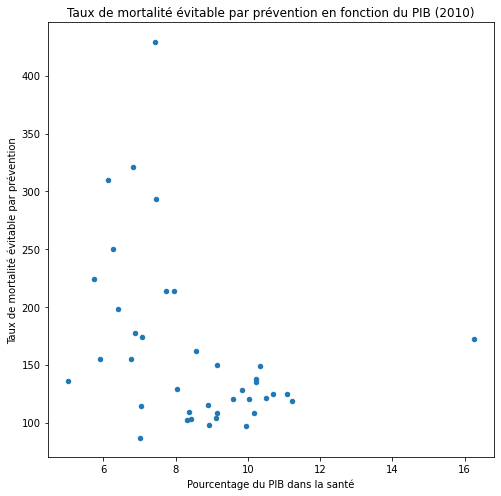

In [28]:
pib_mortalité_evitable_prevention0 = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee0T.iloc[0],
   'Taux de mortalité évitable par prévention': mortalite_prevention_annee0T.iloc[0]
   })

pib_mortalité_evitable_prevention0.plot.scatter(x='Pourcentage du PIB dans la santé', y='Taux de mortalité évitable par prévention', figsize=(fig_size, fig_size))
plt.title('Taux de mortalité évitable par prévention en fonction du PIB (%d)' % Annee0)
plt.savefig("img/Taux de mortalité évitable par prévention en fonction du PIB (%d).png" % Annee0)
plt.show()

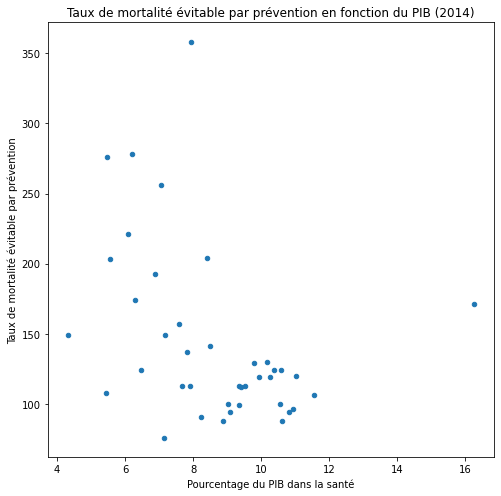

In [29]:
pib_mortalité_evitable_prevention1 = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee1T.iloc[0],
   'Taux de mortalité évitable par prévention': mortalite_prevention_annee1T.iloc[0]
   })

pib_mortalité_evitable_prevention1.plot.scatter(x='Pourcentage du PIB dans la santé', y='Taux de mortalité évitable par prévention', figsize=(fig_size, fig_size))
plt.title('Taux de mortalité évitable par prévention en fonction du PIB (%d)' % Annee1)
plt.savefig("img/Taux de mortalité évitable par prévention en fonction du PIB (%d).png" % Annee1)
plt.show()

#### Taux de mortalité évitable par prévention en fonction de l'espérance de vie

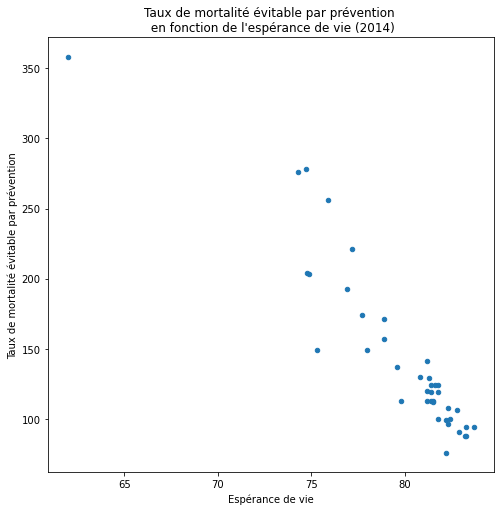

In [30]:
esperance_mortalité_evitable_prevention1 = pd.DataFrame({
   'Espérance de vie': esperance_annee1T.iloc[0],
   'Taux de mortalité évitable par prévention': mortalite_prevention_annee1T.iloc[0]
   })

esperance_mortalité_evitable_prevention1.plot.scatter(x='Espérance de vie', y='Taux de mortalité évitable par prévention', figsize=(fig_size, fig_size))
plt.title("Taux de mortalité évitable par prévention \n en fonction de l'espérance de vie (%d)" % Annee1)
plt.savefig("img/Taux de mortalité évitable par prévention en fonction de l'espérance de vie (%d).png" % Annee1)
plt.show()

#### Regression Line  - Taux de mortalité évitable par prévention en fonction de l'espérance de vie 

In [31]:
mortalite_prevention_annee1T

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2014              358        120        100       124       124     204   

Pays   Canada  Chili  Colombie  Corée  ...  Pologne  Portugal  Royaume-Uni  \
Année                                  ...                                   
2014      119    137       149    124  ...      174       113          119   

Pays   République slovaque  République tchèque  Slovénie  Suisse  Suède  \
Année                                                                     
2014                   193                 157       141      88     96   

Pays   Turquie  États-Unis  
Année                       
2014       149         171  

[1 rows x 40 columns]

In [32]:
# manip nécessaire, on possède 44 PIB mais que 39 données sur la mortalité prevention, on supprime les pib dont on n'a pas les mortalités
esperance_format_mortalite_prevention_annee1  = esperance_annee1T[esperance_annee1T.columns.intersection(mortalite_prevention_annee1T.columns.values)]
esperance_format_mortalite_prevention_annee1

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2014             62.0       81.2       82.4      81.6      81.4    74.8   

Pays   Canada  Chili  Colombie  Corée  ...  Pologne  Portugal  Royaume-Uni  \
Année                                  ...                                   
2014     81.8   79.6      75.3   81.8  ...     77.7      81.2         81.4   

Pays   République slovaque  République tchèque  Slovénie  Suisse  Suède  \
Année                                                                     
2014                  76.9                78.9      81.2    83.3   82.3   

Pays   Turquie  États-Unis  
Année                       
2014      78.0        78.9  

[1 rows x 40 columns]

In [33]:
X = esperance_format_mortalite_prevention_annee1.iloc[0].values.reshape(-1,1)
Y = mortalite_prevention_annee1T.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

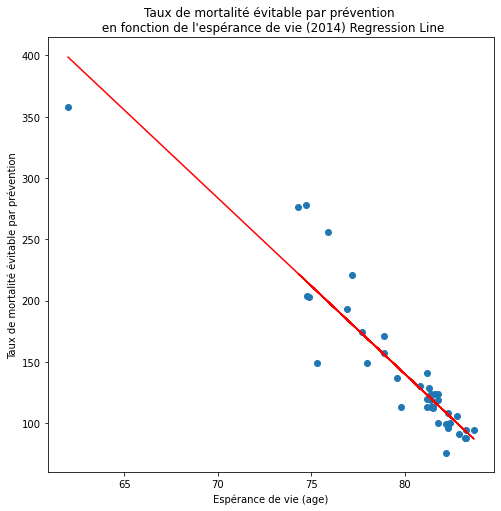

In [34]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Espérance de vie (age)")
plt.ylabel("Taux de mortalité évitable par prévention")
plt.title("Taux de mortalité évitable par prévention \n en fonction de l'espérance de vie (%d) Regression Line" % Annee1)
plt.savefig("img/Taux de mortalité évitable par prévention en fonction de l'espérance de vie (%d) Regression Line.png" % Annee1)
plt.show()

In [35]:
# manip nécessaire, on possède 44 PIB mais que 39 données sur la mortalité prevention, on supprime les pib dont on n'a pas les mortalités
pib_format_mortalite_prevention_annee1  = pib_annee1T[pib_annee1T.columns.intersection(mortalite_prevention_annee1T.columns.values)]
pib_format_mortalite_prevention_annee1

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
AnnΘe                                                                     
2014             7.93     11.022      9.036    10.368    10.594   8.396   

Pays   Canada  Chili  Colombie  Corée  ...  Pologne  Portugal  Royaume-Uni  \
AnnΘe                                  ...                                   
2014   10.249  7.807     7.186  6.479  ...     6.28     9.343         9.95   

Pays   République slovaque  République tchèque  Slovénie  Suisse   Suède  \
AnnΘe                                                                      
2014                 6.892               7.597     8.502  10.616  10.948   

Pays   Turquie  États-Unis  
AnnΘe                       
2014     4.325      16.253  

[1 rows x 40 columns]

In [36]:
X = pib_format_mortalite_prevention_annee1.iloc[0].values.reshape(-1,1)
Y = mortalite_prevention_annee1T.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

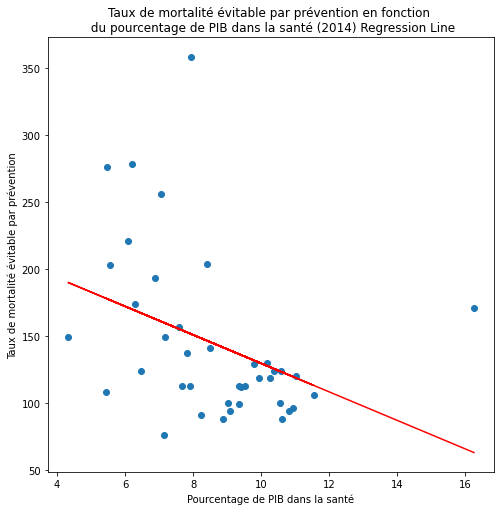

In [37]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Pourcentage de PIB dans la santé")
plt.ylabel("Taux de mortalité évitable par prévention")
plt.title("Taux de mortalité évitable par prévention en fonction \n du pourcentage de PIB dans la santé (%d) Regression Line" % Annee1)
plt.savefig("img/Taux de mortalité évitable par prévention en fonction du pourcentage de PIB dans la santé (%d) Regression Line.png" % Annee1)
plt.show()

In [38]:
lr.score(X,Y)

0.14624731233541088

ça laisse penser que plus un pays fait de la prévention, plus l'espérance de vie augmente

#### Clustering  - Taux de mortalité évitable par prévention en fonction de l'espérance de vie 

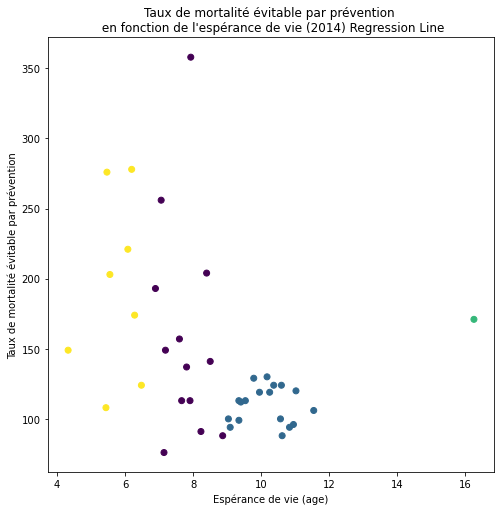

In [39]:
y_pred = KMeans(n_clusters=4, random_state=0).fit_predict(X)
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y, c=y_pred)
plt.xlabel("Espérance de vie (age)")
plt.ylabel("Taux de mortalité évitable par prévention")
plt.title("Taux de mortalité évitable par prévention \n en fonction de l'espérance de vie (%d) Regression Line" % Annee1)
plt.savefig("img/Taux de mortalité évitable par prévention en fonction de l'espérance de vie (%d) Clustering.png" % Annee1)
plt.show()

#### 3D - Taux de mortalité évitable par prévention en fonction de l'espérance de vie et du PIB

In [40]:
pib_format_mortalite_prevention_annee1  = pib_annee1T[pib_annee1T.columns.intersection(mortalite_prevention_annee1T.columns.values)]
pib_format_mortalite_prevention_annee1

x = esperance_format_mortalite_prevention_annee1.iloc[0].values.reshape(-1,1)
y = mortalite_prevention_annee1T.iloc[0].values.reshape(-1,1)
z = pib_format_mortalite_prevention_annee1.iloc[0].values.reshape(-1,1)

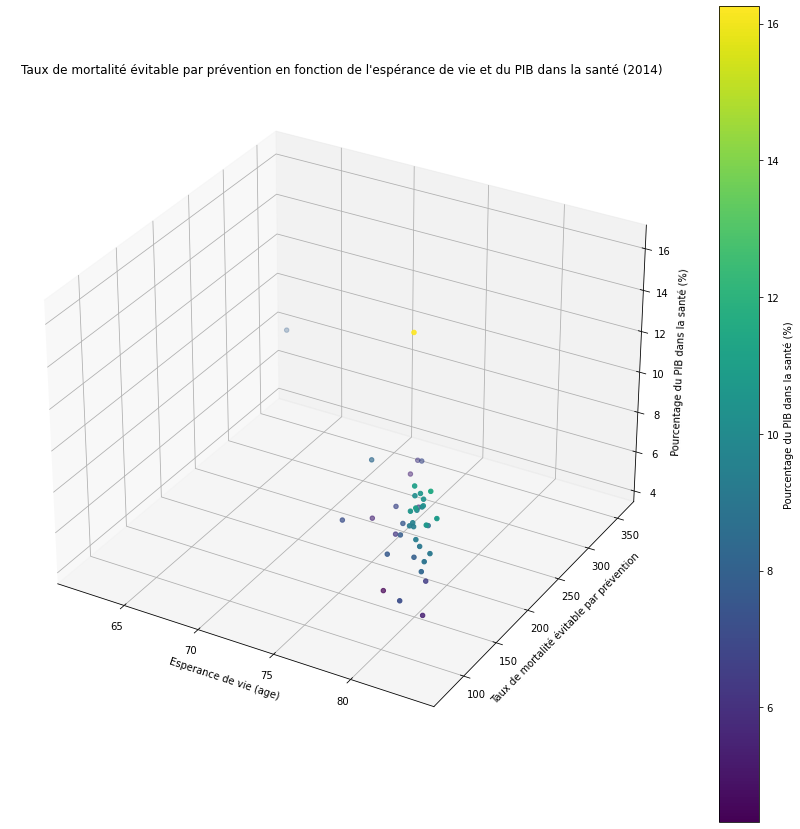

In [41]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
pnt3d= ax.scatter3D(x,y,z,c=z)
ax.set_xlabel('Esperance de vie (age)')
ax.set_ylabel('Taux de mortalité évitable par prévention')
ax.set_zlabel('Pourcentage du PIB dans la santé (%)')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Pourcentage du PIB dans la santé (%)")
plt.title("Taux de mortalité évitable par prévention en fonction de l'espérance de vie et du PIB dans la santé (%d)" % Annee1)
plt.savefig("img/Taux de mortalité évitable par prévention en fonction de l'espérance de vie et du PIB dans la santé (%d) 3d.png" % Annee1)
plt.show()

## Mortalité évitable prévention

In [42]:
### Année qu'on veut récupérer
Annee0 = 2010
Annee1 = 2014

pib_annee0 = pib.loc[pib['AnnΘe'] == Annee0]
pib_annee1 = pib.loc[pib['AnnΘe'] == Annee1]

esperance_annee0 = esperance.loc[esperance['Année'] == Annee0]
esperance_annee1 = esperance.loc[esperance['Année'] == Annee1]

pib_annee0 = pd.pivot_table(pib_annee0,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee0T = pib_annee0.T

pib_annee1 = pd.pivot_table(pib_annee1,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee1T = pib_annee1.T

esperance_annee0 = pd.pivot_table(esperance_annee0,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee0T = esperance_annee0.T

esperance_annee1 = pd.pivot_table(esperance_annee1,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee1T = esperance_annee1.T

### Extraction des données

In [43]:
df = pd.read_csv(r"mortalite_evitable_traitement.csv", delimiter=',')
df

VAR                                  Variable      UNIT  \
0    AVDMTRTM  Mortalité évitable grâce aux traitements  TXCMILTX   
1    AVDMTRTM  Mortalité évitable grâce aux traitements  TXCMILTX   
2    AVDMTRTM  Mortalité évitable grâce aux traitements  TXCMILTX   
3    AVDMTRTM  Mortalité évitable grâce aux traitements  TXCMILTX   
4    AVDMTRTM  Mortalité évitable grâce aux traitements  TXCMILTX   
..        ...                                       ...       ...   
693  AVDMTRTM  Mortalité évitable grâce aux traitements  TXCMILTX   
694  AVDMTRTM  Mortalité évitable grâce aux traitements  TXCMILTX   
695  AVDMTRTM  Mortalité évitable grâce aux traitements  TXCMILTX   
696  AVDMTRTM  Mortalité évitable grâce aux traitements  TXCMILTX   
697  AVDMTRTM  Mortalité évitable grâce aux traitements  TXCMILTX   

                                               Mesure  COU       Pays   YEA  \
0    Décès pour 100 000 personnes (taux standardisés)  DEU  Allemagne  2000   
1    Décès pour 100 000 personnes (taux standardisés)  DEU  Allemagne  2001   
2    Décès pour 100 000 personnes (taux standardisés)  DEU  Allemagne  2002   
3    Décès pour 100 000 personnes (taux standardisés)  DEU  Allemagne  2003   
4    Décès pour 100 000 personnes (taux standardisés)  DEU  Allemagne  2004   
..                                                ...  ...        ...   ...   
693  Décès pour 100 000 personnes (taux standardisés)  GRC      Grèce  2014   
694  Décès pour 100 000 personnes (taux standardisés)  GRC      Grèce  2015   
695  Décès pour 100 000 personnes (taux standardisés)  GRC      Grèce  2016   
696  Décès pour 100 000 personnes (taux standardisés)  GRC      Grèce  2017   
697  Décès pour 100 000 personnes (taux standardisés)  GRC      Grèce  2018   

     Année  Value Flag Codes Flags  
0     2000    101        NaN   NaN  
1     2001     98        NaN   NaN  
2     2002     96        NaN   NaN  
3     2003     94        NaN   NaN  
4     2004     89        NaN   NaN  
..     ...    ...        ...   ...  
693   2014     74        NaN   NaN  
694   2015     75        NaN   NaN  
695   2016     75        NaN   NaN  
696   2017     73        NaN   NaN  
697   2018     69        NaN   NaN  

[698 rows x 11 columns]

In [44]:
mortalite_traitement = df[['Pays','Année','Value']]
mortalite_traitement_annee0 = mortalite_traitement.loc[mortalite_traitement['Année'] == Annee0]
mortalite_traitement_annee1 = mortalite_traitement.loc[mortalite_traitement['Année'] == Annee1]
mortalite_traitement

Pays  Année  Value
0    Allemagne   2000    101
1    Allemagne   2001     98
2    Allemagne   2002     96
3    Allemagne   2003     94
4    Allemagne   2004     89
..         ...    ...    ...
693      Grèce   2014     74
694      Grèce   2015     75
695      Grèce   2016     75
696      Grèce   2017     73
697      Grèce   2018     69

[698 rows x 3 columns]

In [45]:
mortalite_traitement = pd.pivot_table(mortalite_traitement,index='Pays',columns='Année',values='Value', fill_value=0)
mortalite_traitementT = mortalite_traitement.T

mortalite_traitement_annee0 = pd.pivot_table(mortalite_traitement_annee0,index='Pays',columns='Année',values='Value', fill_value=0)
mortalite_traitement_annee0T = mortalite_traitement_annee0.T

mortalite_traitement_annee1 = pd.pivot_table(mortalite_traitement_annee1,index='Pays',columns='Année',values='Value', fill_value=0)
mortalite_traitement_annee1T = mortalite_traitement_annee1.T

mortalite_traitementT

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2000              351        101         83         0        92     157   
2001              388         98         80         0        86     151   
2002              423         96         78        91        86     149   
2003              466         94         74        88        84     149   
2004              464         89         69        82        79     150   
2005              474         86          0        79        78     146   
2006              455         82         65        76        73     149   
2007              447         80         62        72        72     147   
2008              428         77         61        68        70     147   
2009              413         75         58        68        68     147   
2010              387         73         56        65        65     146   
2011              360         70         55        62        63     147   
2012              325         68         52        60        62     143   
2013              296         69         51        59        61     143   
2014              286         66         51        58        56     140   
2015              278         67         51        59        56     139   
2016                0         66         49        58        54     140   
2017                0         64         48        57         0     135   
2018                0         64         46        56         0     133   
2019                0         62          0        55         0     129   

Pays   Canada  Chili  Colombie  Corée  ...  Pologne  Portugal  Royaume-Uni  \
Année                                  ...                                   
2000       86    111       144    104  ...      157         0            0   
2001       83    113       140    100  ...      149         0          112   
2002       81    105       135     97  ...      141       104          108   
2003       80    101       135     91  ...      140       100          105   
2004       77     99       131     86  ...      136         0           99   
2005       76     95       121     79  ...      133         0           95   
2006       72     92       126     75  ...      133         0           92   
2007       72     91       120     70  ...      130        82           88   
2008       71     88       118     65  ...      127        82           86   
2009       67     90       110     60  ...      124        80           81   
2010       65     90       107     59  ...      117        76           78   
2011       63     84       101     56  ...      114        73           73   
2012       62     83       102     55  ...      112        71           71   
2013       61     85        99     51  ...      108        69           70   
2014       60     85        96     50  ...      100        69           68   
2015       59     82        97     49  ...      100        67           69   
2016       58     79        98     47  ...       99        69           69   
2017       56     77        94     45  ...      100        66            0   
2018        0     75         0     44  ...       99        64            0   
2019        0      0         0     42  ...        0         0            0   

Pays   République slovaque  République tchèque  Slovénie  Suisse  Suède  \
Année                                                                     
2000                   202                 167       113      70     86   
2001                   199                 159       111      64     82   
2002                   193                 157       110      63     81   
2003                   190                 154       107      61     78   
2004                   184                 147       100      57     72   
2005                   181                 139        96      57     70   
2006                   178      

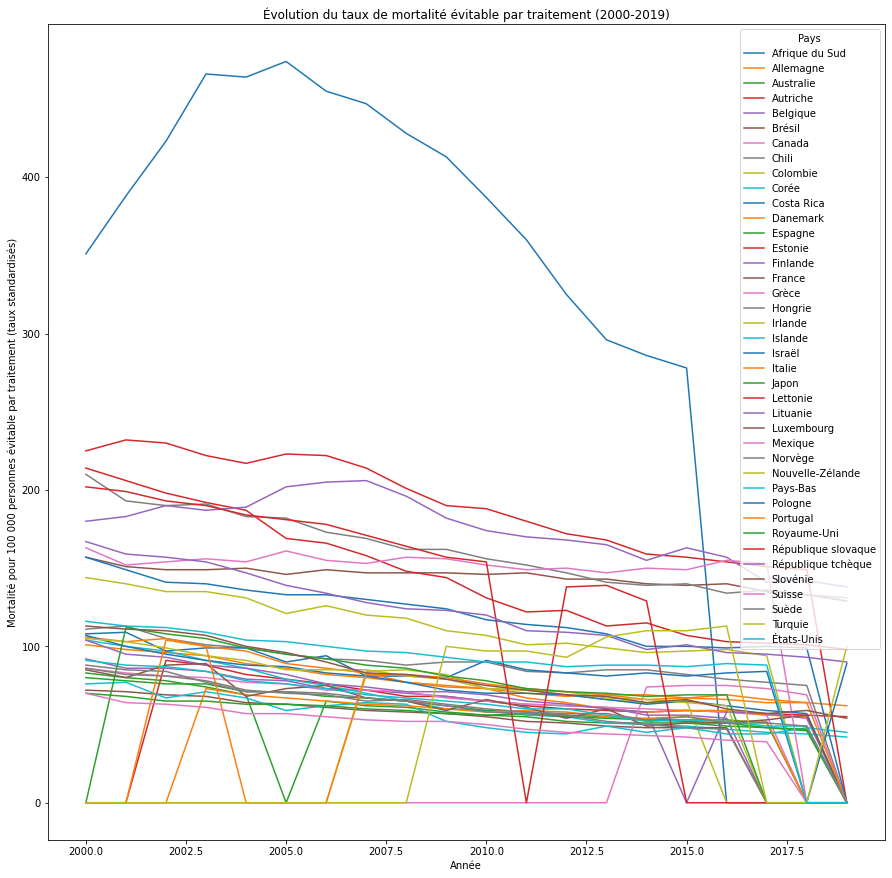

In [46]:
mortalite_traitementT.plot(figsize=(15, 15))
plt.xlabel("Année")
plt.ylabel("Mortalité pour 100 000 personnes évitable par traitement (taux standardisés)")
plt.title("Évolution du taux de mortalité évitable par traitement (2000-2019)")
plt.savefig("img/Évolution du taux de mortalité évitable par traitement (2000-2019).png")
plt.show()

### Traitement (regression linéaire, clustering, ...)

#### Taux de mortalité évitable par traitement en fonction du PIB

In [47]:
mortalite_traitement_annee0T

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2010              387         73         56        65        65     146   

Pays   Canada  Chili  Colombie  Corée  ...  Pologne  Portugal  Royaume-Uni  \
Année                                  ...                                   
2010       65     90       107     59  ...      117        76           78   

Pays   République slovaque  République tchèque  Slovénie  Suisse  Suède  \
Année                                                                     
2010                   154                 120        75      50     60   

Pays   Turquie  États-Unis  
Année                       
2010        97          90  

[1 rows x 39 columns]

In [48]:
mortalite_traitement_annee1T

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2014              286         66         51        58        56     140   

Pays   Canada  Chili  Colombie  Corée  ...  Pologne  Portugal  Royaume-Uni  \
Année                                  ...                                   
2014       60     85        96     50  ...      100        69           68   

Pays   République slovaque  République tchèque  Slovénie  Suisse  Suède  \
Année                                                                     
2014                   129                  98        64      43     53   

Pays   Turquie  États-Unis  
Année                       
2014       110          88  

[1 rows x 40 columns]

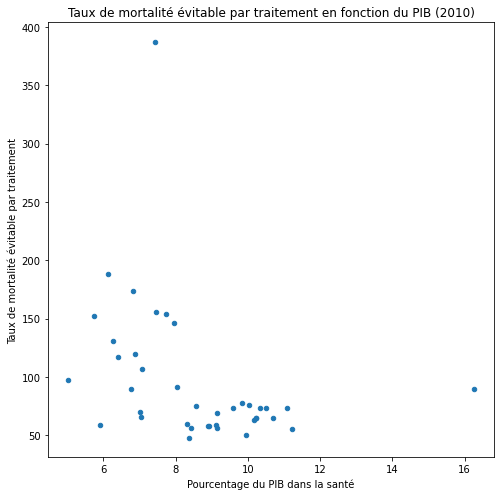

In [49]:
pib_mortalité_evitable_traitement0 = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee0T.iloc[0],
   'Taux de mortalité évitable par traitement': mortalite_traitement_annee0T.iloc[0]
   })

pib_mortalité_evitable_traitement0.plot.scatter(x='Pourcentage du PIB dans la santé', y='Taux de mortalité évitable par traitement', figsize=(fig_size, fig_size))
plt.title('Taux de mortalité évitable par traitement en fonction du PIB (%d)' % Annee0)
plt.savefig("img/Taux de mortalité évitable par traitement en fonction du PIB (%d).png" % Annee0)
plt.show()

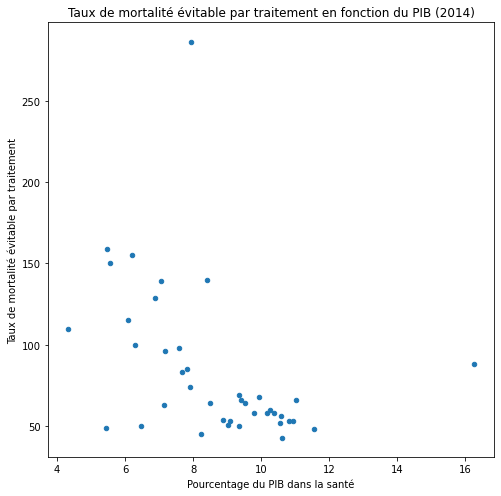

In [50]:
pib_mortalité_evitable_traitement1 = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee1T.iloc[0],
   'Taux de mortalité évitable par traitement': mortalite_traitement_annee1T.iloc[0]
   })

pib_mortalité_evitable_traitement1.plot.scatter(x='Pourcentage du PIB dans la santé', y='Taux de mortalité évitable par traitement', figsize=(fig_size, fig_size))
plt.title('Taux de mortalité évitable par traitement en fonction du PIB (%d)' % Annee1)
plt.savefig("img/Taux de mortalité évitable par traitement en fonction du PIB (%d).png" % Annee1)
plt.show()

#### Taux de mortalité évitable par traitement en fonction de l'espérance de vie

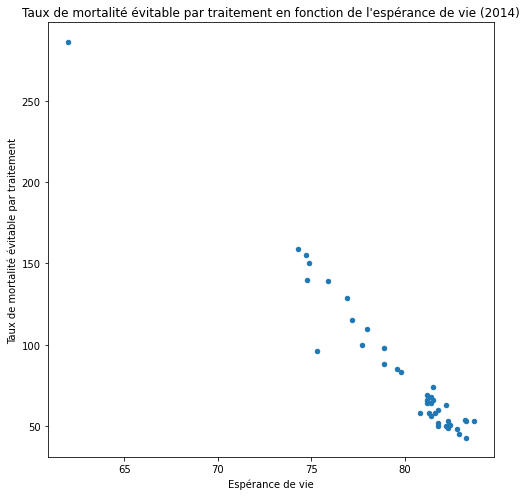

In [51]:
esperance_mortalité_evitable_traitement1 = pd.DataFrame({
   'Espérance de vie': esperance_annee1T.iloc[0],
   'Taux de mortalité évitable par traitement': mortalite_traitement_annee1T.iloc[0]
   })

esperance_mortalité_evitable_traitement1.plot.scatter(x='Espérance de vie', y='Taux de mortalité évitable par traitement', figsize=(fig_size, fig_size))
plt.title("Taux de mortalité évitable par traitement en fonction de l'espérance de vie (%d)" % Annee1)
plt.savefig("img/Taux de mortalité évitable par traitement en fonction de l'espérance de vie (%d).png" % Annee1)
plt.show()

#### Regression Line  - Taux de mortalité évitable par traitement en fonction de l'espérance de vie 

In [52]:
mortalite_traitement_annee1T

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2014              286         66         51        58        56     140   

Pays   Canada  Chili  Colombie  Corée  ...  Pologne  Portugal  Royaume-Uni  \
Année                                  ...                                   
2014       60     85        96     50  ...      100        69           68   

Pays   République slovaque  République tchèque  Slovénie  Suisse  Suède  \
Année                                                                     
2014                   129                  98        64      43     53   

Pays   Turquie  États-Unis  
Année                       
2014       110          88  

[1 rows x 40 columns]

In [53]:
# manip nécessaire, on possède 44 PIB mais que 39 données sur la mortalité prevention, on supprime les pib dont on n'a pas les mortalités
esperance_format_mortalite_traitement_annee1  = esperance_annee1T[esperance_annee1T.columns.intersection(mortalite_traitement_annee1T.columns.values)]
esperance_format_mortalite_traitement_annee1

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2014             62.0       81.2       82.4      81.6      81.4    74.8   

Pays   Canada  Chili  Colombie  Corée  ...  Pologne  Portugal  Royaume-Uni  \
Année                                  ...                                   
2014     81.8   79.6      75.3   81.8  ...     77.7      81.2         81.4   

Pays   République slovaque  République tchèque  Slovénie  Suisse  Suède  \
Année                                                                     
2014                  76.9                78.9      81.2    83.3   82.3   

Pays   Turquie  États-Unis  
Année                       
2014      78.0        78.9  

[1 rows x 40 columns]

In [54]:
X = esperance_format_mortalite_traitement_annee1.iloc[0].values.reshape(-1,1)
Y = mortalite_traitement_annee1T.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

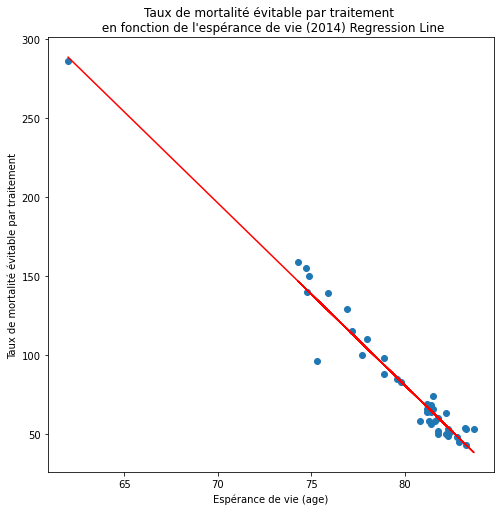

In [55]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Espérance de vie (age)")
plt.ylabel("Taux de mortalité évitable par traitement")
plt.title("Taux de mortalité évitable par traitement \n en fonction de l'espérance de vie (%d) Regression Line" % Annee1)
plt.savefig("img/Taux de mortalité évitable par traitement en fonction de l'espérance de vie (%d) Regression Line.png" % Annee1)
plt.show()

In [56]:
pib_format_mortalite_traitement_annee1  = pib_annee1T[pib_annee1T.columns.intersection(mortalite_traitement_annee1T.columns.values)]
pib_format_mortalite_traitement_annee1

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
AnnΘe                                                                     
2014             7.93     11.022      9.036    10.368    10.594   8.396   

Pays   Canada  Chili  Colombie  Corée  ...  Pologne  Portugal  Royaume-Uni  \
AnnΘe                                  ...                                   
2014   10.249  7.807     7.186  6.479  ...     6.28     9.343         9.95   

Pays   République slovaque  République tchèque  Slovénie  Suisse   Suède  \
AnnΘe                                                                      
2014                 6.892               7.597     8.502  10.616  10.948   

Pays   Turquie  États-Unis  
AnnΘe                       
2014     4.325      16.253  

[1 rows x 40 columns]

In [57]:
X = pib_format_mortalite_traitement_annee1.iloc[0].values.reshape(-1,1)
Y = mortalite_traitement_annee1T.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

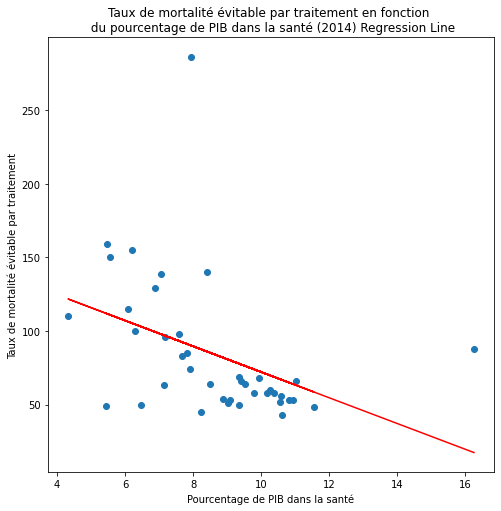

In [58]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Pourcentage de PIB dans la santé")
plt.ylabel("Taux de mortalité évitable par traitement")
plt.title("Taux de mortalité évitable par traitement en fonction \n du pourcentage de PIB dans la santé (%d) Regression Line" % Annee1)
plt.savefig("img/Taux de mortalité évitable par traitement en fonction du pourcentage de PIB dans la santé (%d) Regression Line.png" % Annee1)
plt.show()

In [59]:
lr.score(X,Y)

0.17116451744659078

#### Clustering  - Taux de mortalité évitable par traitement en fonction de l'espérance de vie 

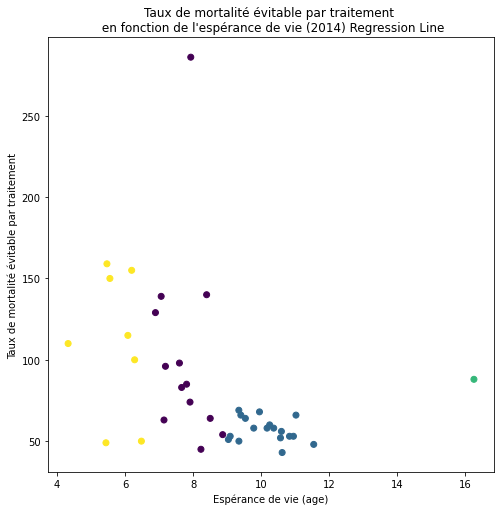

In [60]:
y_pred = KMeans(n_clusters=4, random_state=0).fit_predict(X)
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y, c=y_pred)
plt.xlabel("Espérance de vie (age)")
plt.ylabel("Taux de mortalité évitable par traitement")
plt.title("Taux de mortalité évitable par traitement \n en fonction de l'espérance de vie (%d) Regression Line" % Annee1)
plt.savefig("img/Taux de mortalité évitable par traitement en fonction de l'espérance de vie (%d) Clustering.png" % Annee1)
plt.show()

#### 3D - Taux de mortalité évitable par traitement en fonction de l'espérance de vie et du PIB


In [61]:
pib_format_mortalite_traitement_annee1  = pib_annee1T[pib_annee1T.columns.intersection(mortalite_traitement_annee1T.columns.values)]
pib_format_mortalite_traitement_annee1

x = esperance_format_mortalite_traitement_annee1.iloc[0].values.reshape(-1,1)
y = mortalite_traitement_annee1T.iloc[0].values.reshape(-1,1)
z = pib_format_mortalite_traitement_annee1.iloc[0].values.reshape(-1,1)

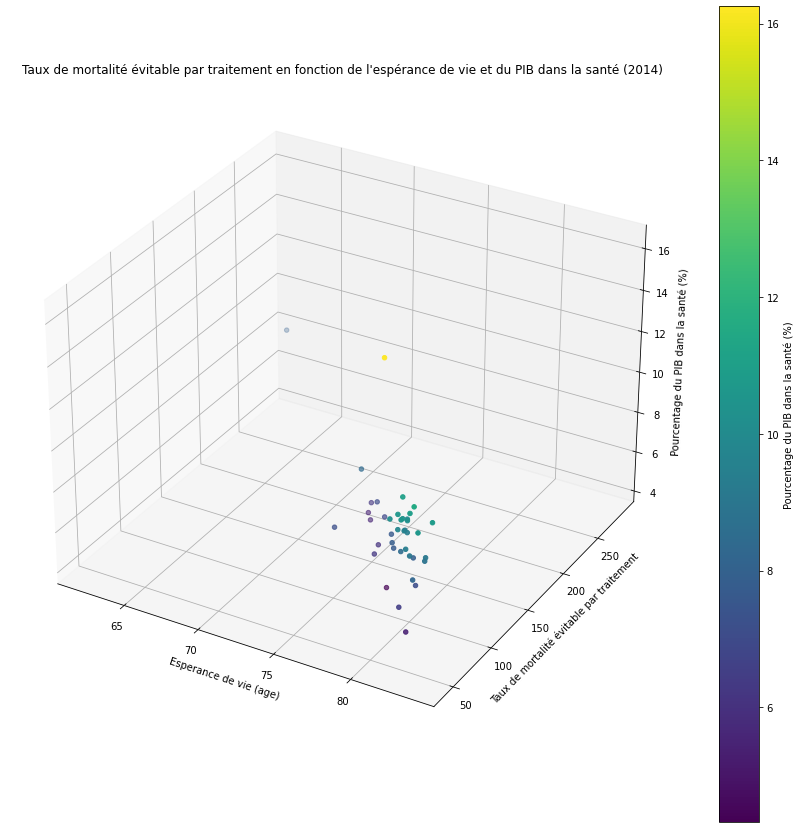

In [62]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
pnt3d= ax.scatter3D(x,y,z,c=z)
ax.set_xlabel('Esperance de vie (age)')
ax.set_ylabel('Taux de mortalité évitable par traitement')
ax.set_zlabel('Pourcentage du PIB dans la santé (%)')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Pourcentage du PIB dans la santé (%)")
plt.title("Taux de mortalité évitable par traitement en fonction de l'espérance de vie et du PIB dans la santé (%d)" % Annee1)
plt.savefig("img/Taux de mortalité évitable par traitement en fonction de l'espérance de vie et du PIB dans la santé (%d) 3d.png" % Annee1)
plt.show()

# Nombre de médecin

In [63]:
### Année qu'on veut récupérer
Annee0 = 2010
Annee1 = 2018

pib_annee0 = pib.loc[pib['AnnΘe'] == Annee0]
pib_annee1 = pib.loc[pib['AnnΘe'] == Annee1]

esperance_annee0 = esperance.loc[esperance['Année'] == Annee0]
esperance_annee1 = esperance.loc[esperance['Année'] == Annee1]

pib_annee0 = pd.pivot_table(pib_annee0,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee0T = pib_annee0.T

pib_annee1 = pd.pivot_table(pib_annee1,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee1T = pib_annee1.T

esperance_annee0 = pd.pivot_table(esperance_annee0,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee0T = esperance_annee0.T

esperance_annee1 = pd.pivot_table(esperance_annee1,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee1T = esperance_annee1.T

### Extraction des données

In [64]:
df = pd.read_csv(r"nb_medecin.csv", delimiter=',')
df

VAR              Variable      UNIT  \
0    PHYSMEDE  Médecins en exercice  DENSPPNB   
1    PHYSMEDE  Médecins en exercice  DENSPPNB   
2    PHYSMEDE  Médecins en exercice  DENSPPNB   
3    PHYSMEDE  Médecins en exercice  DENSPPNB   
4    PHYSMEDE  Médecins en exercice  DENSPPNB   
..        ...                   ...       ...   
673  PHYSMEDE  Médecins en exercice  DENSPPNB   
674  PHYSMEDE  Médecins en exercice  DENSPPNB   
675  PHYSMEDE  Médecins en exercice  DENSPPNB   
676  PHYSMEDE  Médecins en exercice  DENSPPNB   
677  PHYSMEDE  Médecins en exercice  DENSPPNB   

                                                Mesure  COU       Pays   YEA  \
0    Densité pour 1 000 habitants (effectifs employés)  AUS  Australie  2000   
1    Densité pour 1 000 habitants (effectifs employés)  AUS  Australie  2001   
2    Densité pour 1 000 habitants (effectifs employés)  AUS  Australie  2002   
3    Densité pour 1 000 habitants (effectifs employés)  AUS  Australie  2003   
4    Densité pour 1 000 habitants (effectifs employés)  AUS  Australie  2004   
..                                                 ...  ...        ...   ...   
673  Densité pour 1 000 habitants (effectifs employés)  LTU   Lituanie  2015   
674  Densité pour 1 000 habitants (effectifs employés)  LTU   Lituanie  2016   
675  Densité pour 1 000 habitants (effectifs employés)  LTU   Lituanie  2017   
676  Densité pour 1 000 habitants (effectifs employés)  LTU   Lituanie  2018   
677  Densité pour 1 000 habitants (effectifs employés)  LTU   Lituanie  2019   

     Année  Value Flag Codes Flags  
0     2000   2.49        NaN   NaN  
1     2001   2.56        NaN   NaN  
2     2002   2.56        NaN   NaN  
3     2003   2.63        NaN   NaN  
4     2004   2.71        NaN   NaN  
..     ...    ...        ...   ...  
673   2015   4.34        NaN   NaN  
674   2016   4.47        NaN   NaN  
675   2017   4.56        NaN   NaN  
676   2018   4.60        NaN   NaN  
677   2019   4.57        NaN   NaN  

[678 rows x 11 columns]

In [65]:
nb_medecin = df[['Pays','Année','Value']]
nb_medecin_annee0 = nb_medecin.loc[nb_medecin['Année'] == Annee0]
nb_medecin_annee1 = nb_medecin.loc[nb_medecin['Année'] == Annee1]
nb_medecin

Pays  Année  Value
0    Australie   2000   2.49
1    Australie   2001   2.56
2    Australie   2002   2.56
3    Australie   2003   2.63
4    Australie   2004   2.71
..         ...    ...    ...
673   Lituanie   2015   4.34
674   Lituanie   2016   4.47
675   Lituanie   2017   4.56
676   Lituanie   2018   4.60
677   Lituanie   2019   4.57

[678 rows x 3 columns]

In [66]:
nb_medecin = pd.pivot_table(nb_medecin,index='Pays',columns='Année',values='Value', fill_value=0)
nb_medecinT = nb_medecin.T

nb_medecin_annee0 = pd.pivot_table(nb_medecin_annee0,index='Pays',columns='Année',values='Value', fill_value=0)
nb_medecin_annee0T = nb_medecin_annee0.T

nb_medecin_annee1 = pd.pivot_table(nb_medecin_annee1,index='Pays',columns='Année',values='Value', fill_value=0)
nb_medecin_annee1T = nb_medecin_annee1.T

nb_medecinT

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Brésil  \
Année                                                                     
2000             0.00       3.25       2.49      3.85      2.83    1.36   
2001             0.00       3.29       2.56      3.96      2.85    1.40   
2002             0.00       3.32       2.56      4.03      2.86    1.43   
2003             0.00       3.35       2.63      4.11      2.86    1.48   
2004             0.74       3.37       2.71      4.20      2.87    1.60   
2005             0.00       3.40       2.78      4.32      2.87    1.68   
2006             0.00       3.44       2.84      4.45      2.89    1.71   
2007             0.70       3.49       3.01      4.54      2.91    1.74   
2008             0.70       3.54       3.02      4.60      2.92    1.79   
2009             0.71       3.62       3.12      4.69      2.92    1.83   
2010             0.72       3.71       0.00      4.80      2.92    1.82   
2011             0.72       3.88       3.32      4.84      2.92    1.86   
2012             0.73       3.95       3.31      4.90      2.93    0.00   
2013             0.74       4.04       3.37      4.99      2.96    1.89   
2014             0.75       4.11       3.45      5.05      2.98    0.00   
2015             0.78       4.14       3.51      5.09      3.02    0.00   
2016             0.77       4.19       3.58      5.13      3.07    0.00   
2017             0.78       4.25       3.68      5.18      3.08    2.18   
2018             0.79       4.31       3.75      5.24      3.13    0.00   
2019             0.79       4.39       3.83      5.32      3.16    2.32   
2020             0.00       4.47       0.00      5.36      0.00    0.00   

Pays   Canada  Chine (République populaire de)  Corée  Danemark  ...  \
Année                                                            ...   
2000     2.01                             1.24   1.30      2.91  ...   
2001     2.01                             1.26   1.39      2.93  ...   
2002     2.02                             1.12   1.49      3.04  ...   
2003     2.02                             1.17   1.57      3.08  ...   
2004     2.04                             1.20   1.56      3.23  ...   
2005     2.07                             1.22   1.63      3.33  ...   
2006     2.08                             1.25   1.69      3.42  ...   
2007     2.12                             1.27   1.73      3.46  ...   
2008     2.17                             1.32   1.85      3.58  ...   
2009     2.24                             1.40   1.92      3.65  ...   
2010     2.28                             1.44   1.98      3.73  ...   
2011     2.35                             1.47   2.03      3.79  ...   
2012     2.41                             1.55   2.07      3.84  ...   
2013     2.46                             1.64   2.16      3.85  ...   
2014     2.51                             1.70   2.20      3.88  ...   
2015     2.56                             1.78   2.24      3.93  ...   
2016     2.62                             1.88   2.29      4.00  ...   
2017     2.66                             1.99   2.35      4.11  ...   
2018     2.72                             2.11   2.39      4.19  ...   
2019     2.74                             2.24   2.46      0.00  ...   
2020     2.76                             0.00   0.00      0.00  ...   

Pays   Pays-Bas  Pologne  Royaume-Uni  Russie  République slovaque  \
Année                                                                
2000       0.00     2.22         1.98    4.64                 3.23   
2001       0.00     2.27         2.03    4.64                 3.22   
2002       0.00     2.30         2.10    4.70                 3.20   
2003       0.00     2.43         2.19    4.75                 3.15   
2004       0.00     2.29         2.32    4.79                 3.15   
2005       0.00     2.14         2.40    4.82                 0.00   
2006       0.00     2.18         2.45    4.93            

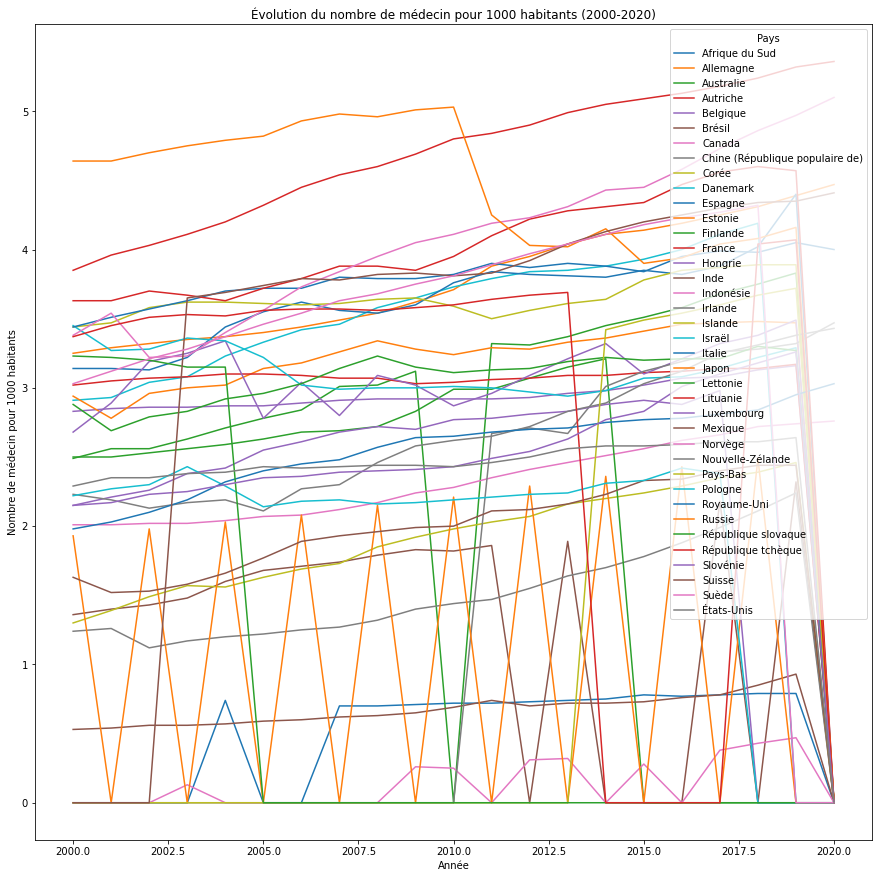

In [67]:
nb_medecinT.plot(figsize=(15, 15))
plt.xlabel("Année")
plt.ylabel("Nombre de médecin pour 1000 habitants")
plt.title("Évolution du nombre de médecin pour 1000 habitants (2000-2020)")
plt.savefig("img/Évolution du nombre de médecin pour 1000 habitants (2000-2020).png")
plt.show()

### Traitement (regression linéaire, clustering, ...)

#### Nombre de médecin en fonction du PIB

In [68]:
nb_medecin_annee0T

Pays   Afrique du Sud  Allemagne  Autriche  Belgique  Brésil  Canada  \
Année                                                                  
2010             0.72       3.71       4.8      2.92    1.82    2.28   

Pays   Chine (République populaire de)  Corée  Danemark  Espagne  ...  \
Année                                                             ...   
2010                              1.44   1.98      3.73     3.76  ...   

Pays   Norvège  Nouvelle-Zélande  Pologne  Royaume-Uni  Russie  \
Année                                                            
2010      4.11              2.62     2.19         2.65    5.03   

Pays   République tchèque  Slovénie  Suisse  Suède  États-Unis  
Année                                                           
2010                  3.6      2.43    3.81   3.81        2.43  

[1 rows x 34 columns]

In [69]:
nb_medecin_annee1T

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Canada  \
Année                                                                     
2018             0.79       4.31       3.75      5.24      3.13    2.72   

Pays   Chine (République populaire de)  Corée  Danemark  Espagne  ...  \
Année                                                             ...   
2018                              2.11   2.39      4.19     4.02  ...   

Pays   Norvège  Nouvelle-Zélande  Pays-Bas  Royaume-Uni  Russie  \
Année                                                             
2018      4.86              3.31      3.67         2.84    4.08   

Pays   République tchèque  Slovénie  Suisse  Suède  États-Unis  
Année                                                           
2018                 4.04      3.18    4.34   4.32        2.61  

[1 rows x 33 columns]

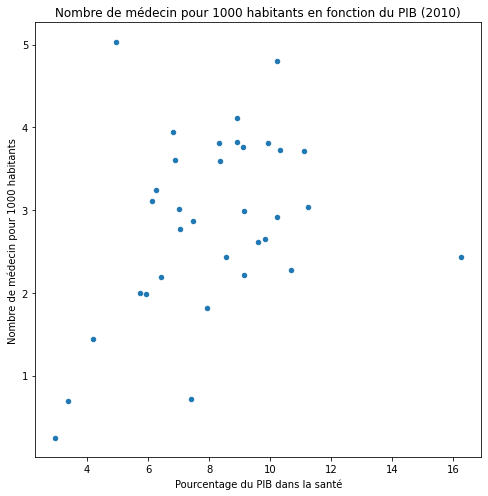

In [70]:
pib_nb_medecin0 = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee0T.iloc[0],
   'Nombre de médecin pour 1000 habitants': nb_medecin_annee0T.iloc[0]
   })

pib_nb_medecin0.plot.scatter(x='Pourcentage du PIB dans la santé', y='Nombre de médecin pour 1000 habitants', figsize=(fig_size, fig_size))
plt.title('Nombre de médecin pour 1000 habitants en fonction du PIB (%d)' % Annee0)
plt.savefig("img/Nombre de médecin pour 1000 habitants en fonction du PIB (%d).png" % Annee0)
plt.show()

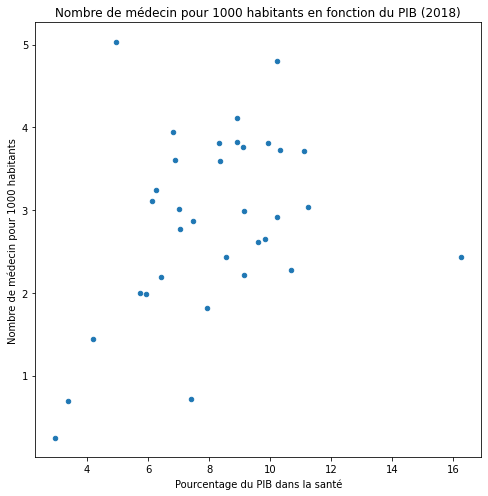

In [71]:
pib_nb_medecin1 = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee1T.iloc[0],
   'Nombre de médecin pour 1000 habitants': nb_medecin_annee1T.iloc[0]
   })

pib_nb_medecin0.plot.scatter(x='Pourcentage du PIB dans la santé', y='Nombre de médecin pour 1000 habitants', figsize=(fig_size, fig_size))
plt.title('Nombre de médecin pour 1000 habitants en fonction du PIB (%d)' % Annee1)
plt.savefig("img/Nombre de médecin pour 1000 habitants en fonction du PIB (%d).png" % Annee1)
plt.show()

#### Nombre de médecin en fonction de l'espérance de vie

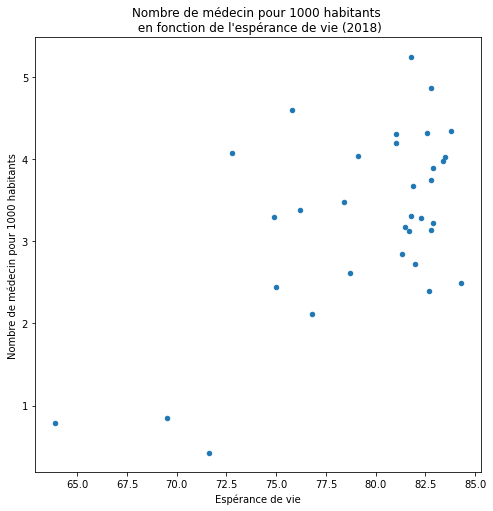

In [72]:
esperance_nb_medecin1 = pd.DataFrame({
   'Espérance de vie': esperance_annee1T.iloc[0],
   'Nombre de médecin pour 1000 habitants': nb_medecin_annee1T.iloc[0]
   })

esperance_nb_medecin1.plot.scatter(x='Espérance de vie', y='Nombre de médecin pour 1000 habitants', figsize=(fig_size, fig_size))
plt.title("Nombre de médecin pour 1000 habitants \n en fonction de l'espérance de vie (%d)" % Annee1)
plt.savefig("img/Nombre de médecin pour 1000 habitants en fonction de l'espérance de vie (%d).png" % Annee1)
plt.show()

#### Regression Line  - Nombre de médecin en fonction de l'espérance de vie 

In [73]:
nb_medecin_annee1T

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Canada  \
Année                                                                     
2018             0.79       4.31       3.75      5.24      3.13    2.72   

Pays   Chine (République populaire de)  Corée  Danemark  Espagne  ...  \
Année                                                             ...   
2018                              2.11   2.39      4.19     4.02  ...   

Pays   Norvège  Nouvelle-Zélande  Pays-Bas  Royaume-Uni  Russie  \
Année                                                             
2018      4.86              3.31      3.67         2.84    4.08   

Pays   République tchèque  Slovénie  Suisse  Suède  États-Unis  
Année                                                           
2018                 4.04      3.18    4.34   4.32        2.61  

[1 rows x 33 columns]

In [74]:
# manip nécessaire, on possède 44 PIB mais que 39 données sur la mortalité prevention, on supprime les pib dont on n'a pas les mortalités
esperance_format_nb_medecin_annee1  = esperance_annee1T[esperance_annee1T.columns.intersection(nb_medecin_annee1T.columns.values)]
esperance_format_nb_medecin_annee1

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Canada  \
Année                                                                     
2018             63.9       81.0       82.8      81.8      81.7    82.0   

Pays   Chine (République populaire de)  Corée  Danemark  Espagne  ...  \
Année                                                             ...   
2018                              76.8   82.7      81.0     83.5  ...   

Pays   Norvège  Nouvelle-Zélande  Pays-Bas  Royaume-Uni  Russie  \
Année                                                             
2018      82.8              81.8      81.9         81.3    72.8   

Pays   République tchèque  Slovénie  Suisse  Suède  États-Unis  
Année                                                           
2018                 79.1      81.5    83.8   82.6        78.7  

[1 rows x 33 columns]

In [75]:
nb_medecin_annee1T_format_esperance_annee1 = nb_medecin_annee1T[nb_medecin_annee1T.columns.intersection(esperance_annee1T.columns.values)]
nb_medecin_annee1T_format_esperance_annee1

Pays   Afrique du Sud  Allemagne  Australie  Autriche  Belgique  Canada  \
Année                                                                     
2018             0.79       4.31       3.75      5.24      3.13    2.72   

Pays   Chine (République populaire de)  Corée  Danemark  Espagne  ...  \
Année                                                             ...   
2018                              2.11   2.39      4.19     4.02  ...   

Pays   Norvège  Nouvelle-Zélande  Pays-Bas  Royaume-Uni  Russie  \
Année                                                             
2018      4.86              3.31      3.67         2.84    4.08   

Pays   République tchèque  Slovénie  Suisse  Suède  États-Unis  
Année                                                           
2018                 4.04      3.18    4.34   4.32        2.61  

[1 rows x 33 columns]

In [76]:
X = esperance_format_nb_medecin_annee1.iloc[0].values.reshape(-1,1)
Y = nb_medecin_annee1T_format_esperance_annee1.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

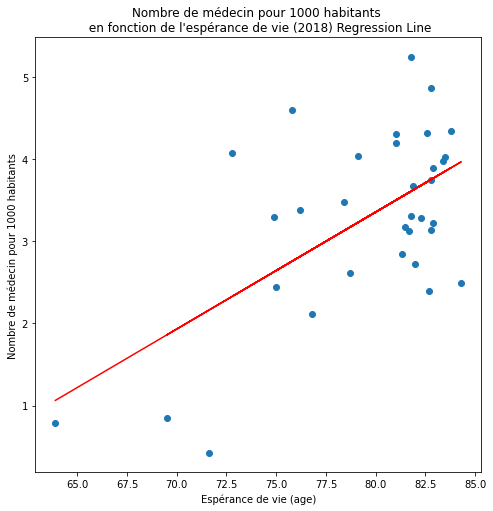

In [77]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Espérance de vie (age)")
plt.ylabel("Nombre de médecin pour 1000 habitants")
plt.title("Nombre de médecin pour 1000 habitants \n en fonction de l'espérance de vie (%d) Regression Line" % Annee1)
plt.savefig("img/Nombre de médecin pour 1000 habitants en fonction de l'espérance de vie (%d) Regression Line.png" % Annee1)
plt.show()

In [78]:
lr.score(X,Y)

0.3655949341502861

#### Clustering  - Nombre de médecin en fonction de l'espérance de vie 

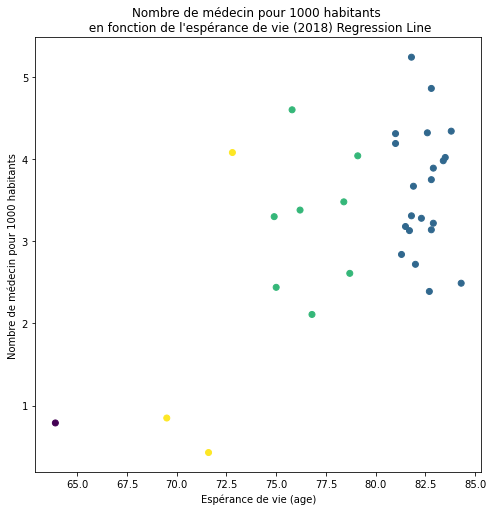

In [79]:
y_pred = KMeans(n_clusters=4, random_state=0).fit_predict(X)
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y, c=y_pred)
plt.xlabel("Espérance de vie (age)")
plt.ylabel("Nombre de médecin pour 1000 habitants")
plt.title("Nombre de médecin pour 1000 habitants \n en fonction de l'espérance de vie (%d) Regression Line" % Annee1)
plt.savefig("img/Nombre de médecin pour 1000 habitants en fonction de l'espérance de vie (%d) Clustering.png" % Annee1)
plt.show()

#### 3D - Nombre de médecin en foncion de l'espérance de vie et du PIB

In [80]:
pib_format_nb_medecin_annee1  = pib_annee1T[pib_annee1T.columns.intersection(nb_medecin_annee1T_format_esperance_annee1.columns.values)]
esperance_format_nb_medecin_annee1  = esperance_format_nb_medecin_annee1[esperance_format_nb_medecin_annee1.columns.intersection(pib_format_nb_medecin_annee1.columns.values)]
nb_medecin_annee1T_format_esperance_annee1 = nb_medecin_annee1T_format_esperance_annee1[nb_medecin_annee1T_format_esperance_annee1.columns.intersection(pib_format_nb_medecin_annee1.columns.values)]


x = esperance_format_nb_medecin_annee1.iloc[0].values.reshape(-1,1)
y = nb_medecin_annee1T_format_esperance_annee1.iloc[0].values.reshape(-1,1)
z = pib_format_nb_medecin_annee1.iloc[0].values.reshape(-1,1)

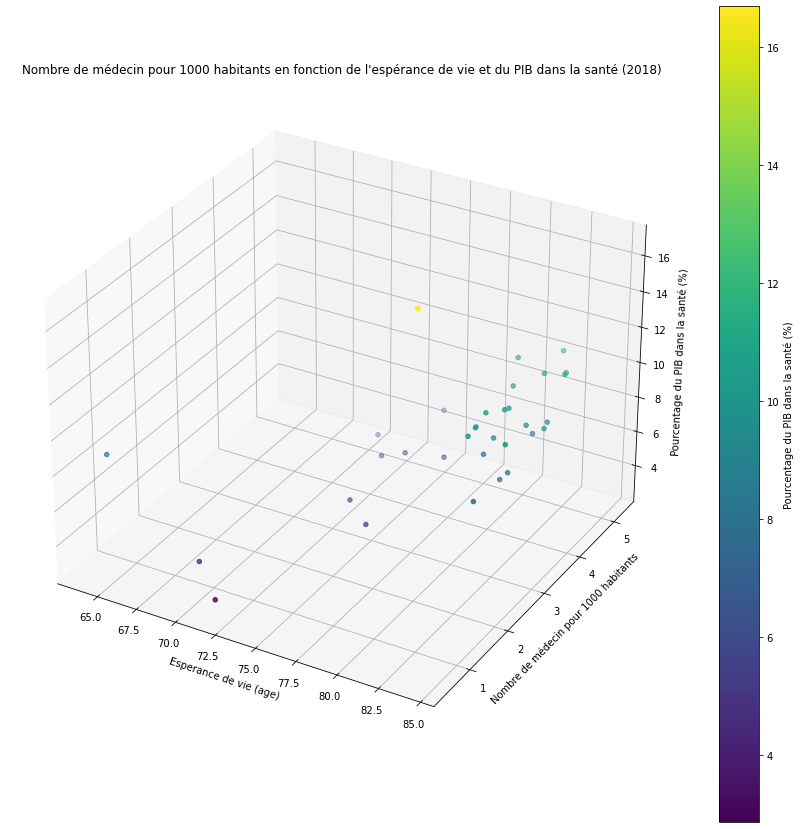

In [81]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
pnt3d= ax.scatter3D(x,y,z,c=z)
ax.set_xlabel('Esperance de vie (age)')
ax.set_ylabel('Nombre de médecin pour 1000 habitants')
ax.set_zlabel('Pourcentage du PIB dans la santé (%)')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Pourcentage du PIB dans la santé (%)")
plt.title("Nombre de médecin pour 1000 habitants en fonction de l'espérance de vie et du PIB dans la santé (%d)" % Annee1)
plt.savefig("img/Nombre de médecin pour 1000 habitants en fonction de l'espérance de vie et du PIB dans la santé (%d) 3d.png" % Annee1)
plt.show()

# Nombre d'hopitaux

In [82]:
### Année qu'on veut récupérer
Annee0 = 2010
Annee1 = 2018

pib_annee0 = pib.loc[pib['AnnΘe'] == Annee0]
pib_annee1 = pib.loc[pib['AnnΘe'] == Annee1]

esperance_annee0 = esperance.loc[esperance['Année'] == Annee0]
esperance_annee1 = esperance.loc[esperance['Année'] == Annee1]

pib_annee0 = pd.pivot_table(pib_annee0,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee0T = pib_annee0.T

pib_annee1 = pd.pivot_table(pib_annee1,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee1T = pib_annee1.T

esperance_annee0 = pd.pivot_table(esperance_annee0,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee0T = esperance_annee0.T

esperance_annee1 = pd.pivot_table(esperance_annee1,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee1T = esperance_annee1.T

### Extraction des données

In [83]:
df = pd.read_csv(r"nb_hopitaux.csv", delimiter=',')
df

VAR  Variable      UNIT                   Mesure  COU       Pays  \
0    HOSPTHOS  Hôpitaux  NBMILPNB  Par million d'habitants  AUS  Australie   
1    HOSPTHOS  Hôpitaux  NBMILPNB  Par million d'habitants  AUS  Australie   
2    HOSPTHOS  Hôpitaux  NBMILPNB  Par million d'habitants  AUS  Australie   
3    HOSPTHOS  Hôpitaux  NBMILPNB  Par million d'habitants  AUS  Australie   
4    HOSPTHOS  Hôpitaux  NBMILPNB  Par million d'habitants  AUS  Australie   
..        ...       ...       ...                      ...  ...        ...   
663  HOSPTHOS  Hôpitaux  NBMILPNB  Par million d'habitants  COL   Colombie   
664  HOSPTHOS  Hôpitaux  NBMILPNB  Par million d'habitants  COL   Colombie   
665  HOSPTHOS  Hôpitaux  NBMILPNB  Par million d'habitants  COL   Colombie   
666  HOSPTHOS  Hôpitaux  NBMILPNB  Par million d'habitants  COL   Colombie   
667  HOSPTHOS  Hôpitaux  NBMILPNB  Par million d'habitants  COL   Colombie   

      YEA  Année   Value Flag Codes Flags  
0    2000   2000   66.48        NaN   NaN  
1    2001   2001   66.56        NaN   NaN  
2    2002   2002   65.86        NaN   NaN  
3    2003   2003   65.21        NaN   NaN  
4    2004   2004   64.77        NaN   NaN  
..    ...    ...     ...        ...   ...  
663  2016   2016  215.35        NaN   NaN  
664  2017   2017  213.14        NaN   NaN  
665  2018   2018  211.14        NaN   NaN  
666  2019   2019  211.12        NaN   NaN  
667  2020   2020  214.08        NaN   NaN  

[668 rows x 11 columns]

In [84]:
nb_hopitaux = df[['Pays','Année','Value']]
nb_hopitaux_annee0 = nb_hopitaux.loc[nb_hopitaux['Année'] == Annee0]
nb_hopitaux_annee1 = nb_hopitaux.loc[nb_hopitaux['Année'] == Annee1]
nb_hopitaux

Pays  Année   Value
0    Australie   2000   66.48
1    Australie   2001   66.56
2    Australie   2002   65.86
3    Australie   2003   65.21
4    Australie   2004   64.77
..         ...    ...     ...
663   Colombie   2016  215.35
664   Colombie   2017  213.14
665   Colombie   2018  211.14
666   Colombie   2019  211.12
667   Colombie   2020  214.08

[668 rows x 3 columns]

In [85]:
nb_hopitaux_T = pd.pivot_table(nb_hopitaux,index='Pays',columns='Année',values='Value', fill_value=0)
nb_hopitauxT = nb_hopitaux_T.T

nb_hopitaux_annee0 = pd.pivot_table(nb_hopitaux_annee0,index='Pays',columns='Année',values='Value', fill_value=0)
nb_hopitaux_annee0T = nb_hopitaux_annee0.T

nb_hopitaux_annee1 = pd.pivot_table(nb_hopitaux_annee1,index='Pays',columns='Année',values='Value', fill_value=0)
nb_hopitaux_annee1T = nb_hopitaux_annee1.T

nb_hopitauxT

Pays   Allemagne  Australie  Autriche  Belgique  Canada  Chili  Colombie  \
Année                                                                      
2000       44.22      66.48     33.58     21.95   25.65  26.85      0.00   
2001       44.06      66.56     32.83     21.48   24.63  27.06      0.00   
2002       43.21      65.86     33.04     21.10   24.46  26.70      0.00   
2003       42.56      65.21     32.14     20.82   23.89  25.29      0.00   
2004       41.93      64.77     32.18     20.54   22.98  25.15      0.00   
2005       41.34      64.53     32.09     20.42   22.86  24.78      0.00   
2006       40.78      64.30     31.81     20.00   22.47  24.96      0.00   
2007       40.43      63.09     32.43     19.58   22.20  24.70      0.00   
2008       40.46      62.12     31.97     19.14   21.78  25.03      0.00   
2009       40.58      61.50     31.88     18.52   21.53  23.81      0.00   
2010       40.37      61.05     31.92     17.90   21.29  24.32    228.74   
2011       40.83      60.21     32.41     17.67   21.11  22.31    215.38   
2012       40.15      59.25     32.86     17.47   20.74  22.01    230.41   
2013       39.47      58.76     32.78     17.03   20.58  22.09    237.56   
2014       38.75      56.31     32.65     16.06   20.32  20.41    241.30   
2015       38.05      55.89     32.17     15.88   20.14  20.20    213.99   
2016       37.64      55.93     31.25     15.62   19.99  19.60    215.35   
2017       37.31      53.94     30.80     15.38   19.76  19.44    213.14   
2018       36.80      53.60     29.86     15.23   19.29  18.83    211.14   
2019       36.42       0.00     29.73     14.27   18.86  18.63    211.12   
2020        0.00       0.00      0.00     14.15    0.00  17.83    214.08   

Pays   Corée  Costa Rica  Espagne  ...  Pologne  Portugal  Royaume-Uni  \
Année                              ...                                   
2000   24.27        9.04    19.01  ...    20.99     21.87         0.00   
2001   23.92        8.85    18.80  ...    21.67     21.52         0.00   
2002   26.61        8.95    18.32  ...    21.76     21.02         0.00   
2003   29.75        9.05    17.56  ...    21.46     20.94         0.00   
2004   31.15        8.91    17.47  ...    23.10     21.18         0.00   
2005   33.95        9.01    17.20  ...    22.90     21.14         0.00   
2006   39.12        8.88    16.80  ...    21.89     21.00         0.00   
2007   46.01        8.75    16.89  ...    24.03     21.44         0.00   
2008   51.21        8.63    16.69  ...    23.50     21.12         0.00   
2009   54.07        8.73    16.61  ...    24.01     21.10         0.00   
2010   56.69        8.82    16.42  ...    25.05     21.85         0.00   
2011   61.36        8.71    16.32  ...    25.43     21.41         0.00   
2012   65.70        9.03    16.23  ...    27.27     21.78        27.42   
2013   68.41        8.91    16.39  ...    28.52     21.61        25.66   
2014   72.36        9.01    16.42  ...    28.83     21.63        24.27   
2015   72.10        8.90    16.47  ...    28.09     21.72        28.90   
2016   73.96        8.79    16.44  ...    28.02     21.79        29.28   
2017   75.68        8.69    16.72  ...    33.55     21.84        29.07   
2018   76.04        8.79    16.71  ...    33.60     22.37        28.75   
2019   77.74        8.70    16.48  ...    32.56     23.14        29.61   
2020    0.00        8.61     0.00  ...     0.00      0.00         0.00   

Pays   République slovaque  République tchèque  Slovénie  Suisse  Suède  \
Année                                                                     
2000                 25.98                0.00     13.58   52.34  10.03   
2001                 25.47                0.00     13.55   50.62   8.66   
2002                 25.48                0.00     13.54   50.10   8.96   
2003                 25.68                0.00     13.53   48.24   9.04   
2004                 26.80                0.00     14.52   46.69   0.00   
2005                 26

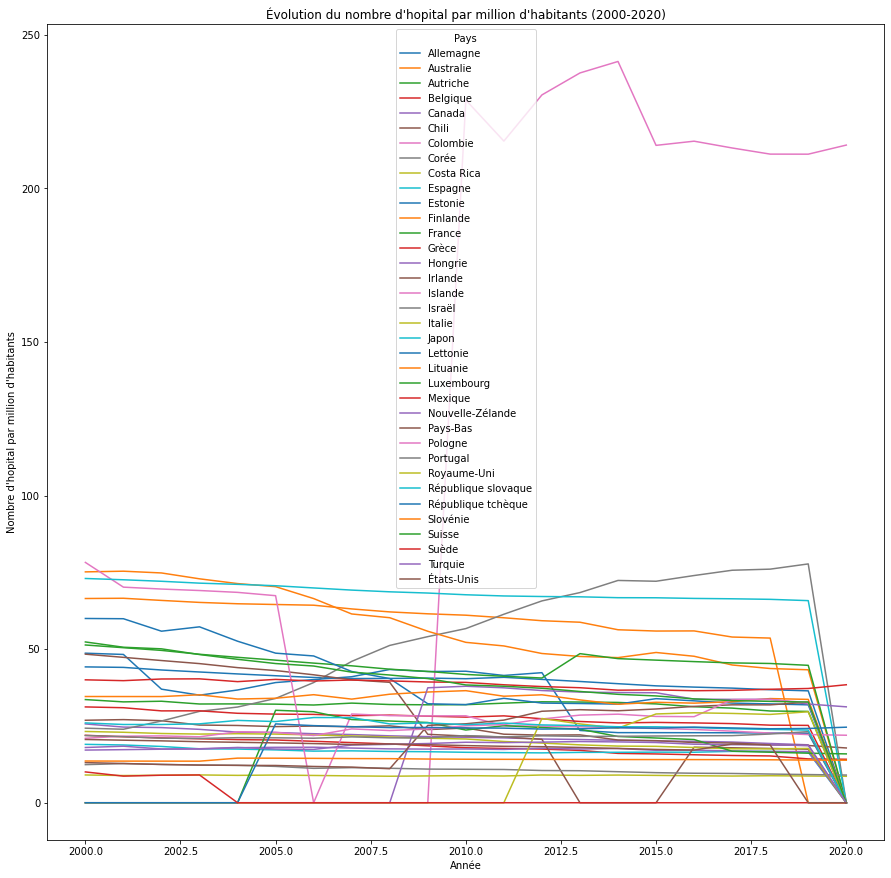

In [86]:
nb_hopitauxT.plot(figsize=(15, 15))
plt.xlabel("Année")
plt.ylabel("Nombre d'hopital par million d'habitants")
plt.title("Évolution du nombre d'hopital par million d'habitants (2000-2020)")
plt.savefig("img/Évolution du nombre d'hopital par million d'habitants (2000-2020).png")
plt.show()

### Traitement (regression linéaire, clustering, ...)

#### Nombre d'hopitaux en fonction du PIB

In [87]:
nb_hopitaux_annee0T

Pays   Allemagne  Australie  Autriche  Belgique  Canada  Chili  Colombie  \
Année                                                                      
2010       40.37      61.05     31.92      17.9   21.29  24.32    228.74   

Pays   Corée  Costa Rica  Espagne  ...  Nouvelle-Zélande  Pays-Bas  Pologne  \
Année                              ...                                        
2010   56.69        8.82    16.42  ...             37.92      25.7    25.05   

Pays   Portugal  République slovaque  République tchèque  Slovénie  Suisse  \
Année                                                                        
2010      21.85                25.41               24.35     14.16   38.34   

Pays   Turquie  États-Unis  
Année                       
2010     19.69        18.6  

[1 rows x 34 columns]

In [88]:
nb_hopitaux_annee1T

Pays   Allemagne  Australie  Autriche  Belgique  Canada  Chili  Colombie  \
Année                                                                      
2018        36.8       53.6     29.86     15.23   19.29  18.83    211.14   

Pays   Corée  Costa Rica  Espagne  ...  Pays-Bas  Pologne  Portugal  \
Année                              ...                                
2018   76.04        8.79    16.71  ...     31.86     33.6     22.37   

Pays   Royaume-Uni  République slovaque  République tchèque  Slovénie  Suisse  \
Année                                                                           
2018         28.75                23.87               24.08     13.98    33.0   

Pays   Turquie  États-Unis  
Année                       
2018     18.84       18.81  

[1 rows x 35 columns]

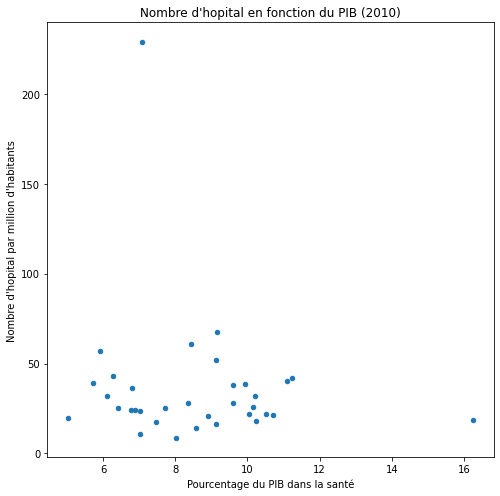

In [89]:
pib_nb_hopitaux0 = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee0T.iloc[0],
   "Nombre d'hopital par million d'habitants": nb_hopitaux_annee0T.iloc[0]
   })

pib_nb_hopitaux0.plot.scatter(x='Pourcentage du PIB dans la santé', y="Nombre d'hopital par million d'habitants", figsize=(fig_size, fig_size))
plt.title("Nombre d'hopital en fonction du PIB (%d)" % Annee0)
plt.savefig("img/Nombre d'hopital en fonction du PIB (%d).png" % Annee0)
plt.show()

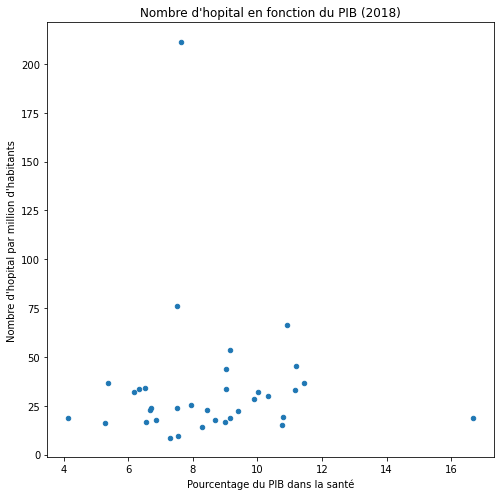

In [90]:
pib_nb_hopitaux1 = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee1T.iloc[0],
   "Nombre d'hopital par million d'habitants": nb_hopitaux_annee1T.iloc[0]
   })

pib_nb_hopitaux1.plot.scatter(x='Pourcentage du PIB dans la santé', y="Nombre d'hopital par million d'habitants", figsize=(fig_size, fig_size))
plt.title("Nombre d'hopital en fonction du PIB (%d)" % Annee1)
plt.savefig("img/Nombre d'hopital en fonction du PIB (%d).png" % Annee1)
plt.show()

#### Nombre d'hopital en fonction de l'espérance de vie

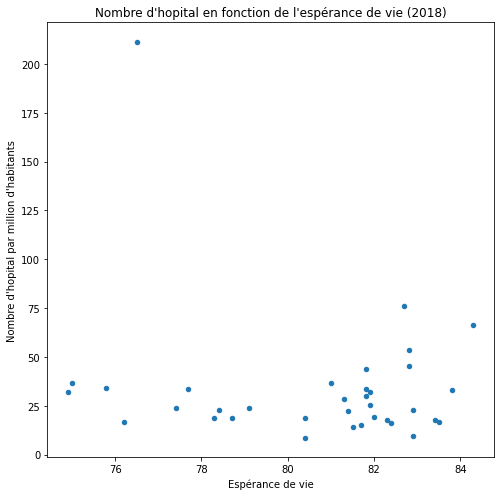

In [91]:
esperance_nb_hopitaux1 = pd.DataFrame({
   'Espérance de vie': esperance_annee1T.iloc[0],
   "Nombre d'hopital par million d'habitants": nb_hopitaux_annee1T.iloc[0]
   })

esperance_nb_hopitaux1.plot.scatter(x='Espérance de vie', y="Nombre d'hopital par million d'habitants", figsize=(fig_size, fig_size))
plt.title("Nombre d'hopital en fonction de l'espérance de vie (%d)" % Annee1)
plt.savefig("img/Nombre d'hopital en fonction de l'espérance de vie (%d).png" % Annee1)
plt.show()

#### Regression Line  - Nombre d'hopitaux en fonction de l'espérance de vie 

In [92]:
nb_hopitaux_annee1T

Pays   Allemagne  Australie  Autriche  Belgique  Canada  Chili  Colombie  \
Année                                                                      
2018        36.8       53.6     29.86     15.23   19.29  18.83    211.14   

Pays   Corée  Costa Rica  Espagne  ...  Pays-Bas  Pologne  Portugal  \
Année                              ...                                
2018   76.04        8.79    16.71  ...     31.86     33.6     22.37   

Pays   Royaume-Uni  République slovaque  République tchèque  Slovénie  Suisse  \
Année                                                                           
2018         28.75                23.87               24.08     13.98    33.0   

Pays   Turquie  États-Unis  
Année                       
2018     18.84       18.81  

[1 rows x 35 columns]

In [93]:
# manip nécessaire, on possède 44 PIB mais que 39 données sur la mortalité prevention, on supprime les pib dont on n'a pas les mortalités
esperance_format_nb_hopitaux_annee1  = esperance_annee1T[esperance_annee1T.columns.intersection(nb_hopitaux_annee1T.columns.values)]
esperance_format_nb_hopitaux_annee1

Pays   Allemagne  Australie  Autriche  Belgique  Canada  Chili  Colombie  \
Année                                                                      
2018        81.0       82.8      81.8      81.7    82.0   80.4      76.5   

Pays   Corée  Costa Rica  Espagne  ...  Pays-Bas  Pologne  Portugal  \
Année                              ...                                
2018    82.7        80.4     83.5  ...      81.9     77.7      81.4   

Pays   Royaume-Uni  République slovaque  République tchèque  Slovénie  Suisse  \
Année                                                                           
2018          81.3                 77.4                79.1      81.5    83.8   

Pays   Turquie  États-Unis  
Année                       
2018      78.3        78.7  

[1 rows x 35 columns]

In [94]:
X = esperance_format_nb_hopitaux_annee1.iloc[0].values.reshape(-1,1)
Y = nb_hopitaux_annee1T.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

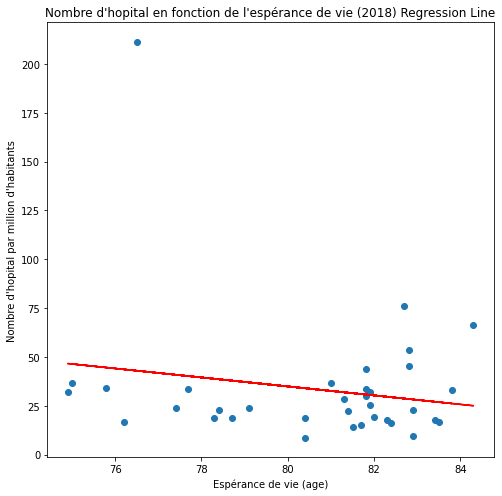

In [95]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Espérance de vie (age)")
plt.ylabel("Nombre d'hopital par million d'habitants")
plt.title("Nombre d'hopital en fonction de l'espérance de vie (%d) Regression Line" % Annee1)
plt.savefig("img/Nombre d'hopital en fonction de l'espérance de vie (%d) Regression Line.png" % Annee1)
plt.show()

In [96]:
lr.score(X,Y)

0.0320357565164654

#### Clustering  - Nombre d'hopitaux en fonction de l'espérance de vie 

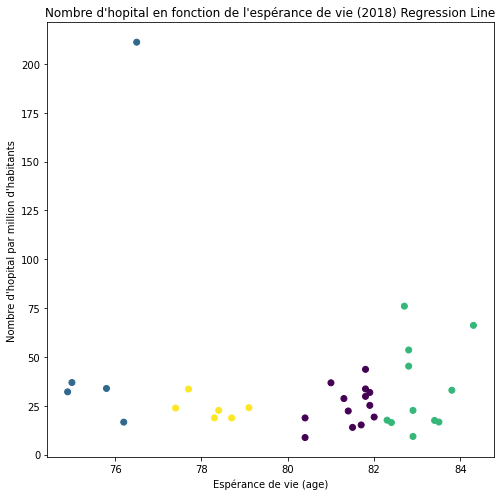

In [97]:
y_pred = KMeans(n_clusters=4, random_state=0).fit_predict(X)
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y, c=y_pred)
plt.xlabel("Espérance de vie (age)")
plt.ylabel("Nombre d'hopital par million d'habitants")
plt.title("Nombre d'hopital en fonction de l'espérance de vie (%d) Regression Line" % Annee1)
plt.savefig("img/Nombre d'hopital en fonction de l'espérance de vie (%d) Clustering.png" % Annee1)
plt.show()

#### 3D - Nombre d'hopitaux en fonction de l'espérance de vie et du PIB

In [98]:
pib_format_nb_hopitaux_annee1  = pib_annee1T[pib_annee1T.columns.intersection(nb_hopitaux_annee1T.columns.values)]
pib_format_nb_hopitaux_annee1

x = esperance_format_nb_hopitaux_annee1.iloc[0].values.reshape(-1,1)
y = nb_hopitaux_annee1T.iloc[0].values.reshape(-1,1)
z = pib_format_nb_hopitaux_annee1.iloc[0].values.reshape(-1,1)

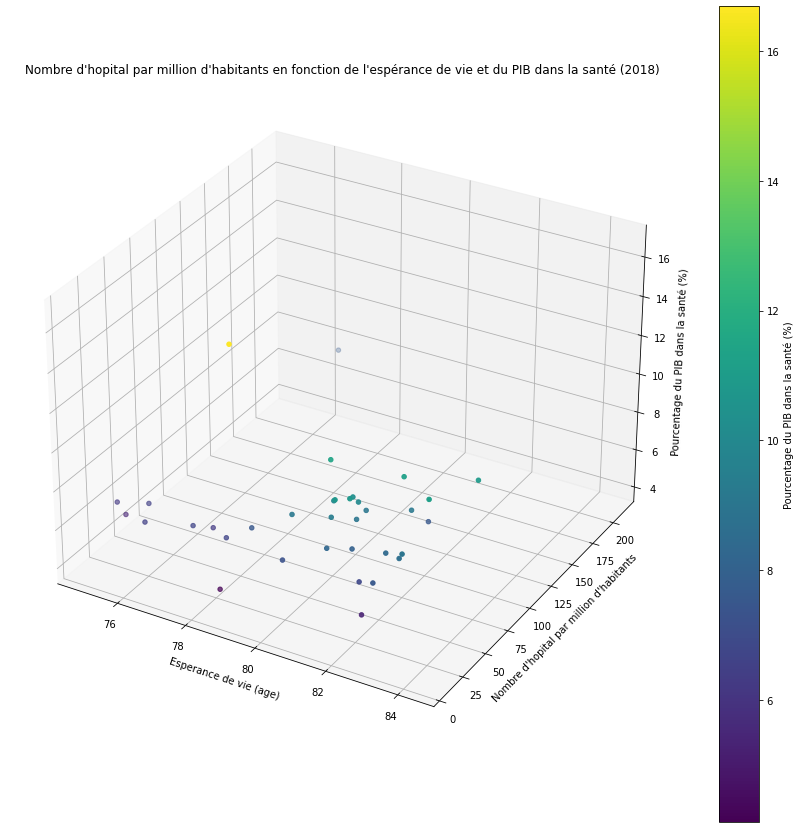

In [99]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
pnt3d= ax.scatter3D(x,y,z,c=z)
ax.set_xlabel('Esperance de vie (age)')
ax.set_ylabel("Nombre d'hopital par million d'habitants")
ax.set_zlabel('Pourcentage du PIB dans la santé (%)')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Pourcentage du PIB dans la santé (%)")
plt.title("Nombre d'hopital par million d'habitants en fonction de l'espérance de vie et du PIB dans la santé (%d)" % Annee1)
plt.savefig("img/Nombre d'hopital par million d'habitants en fonction de l'espérance de vie et du PIB dans la santé (%d) 3d.png" % Annee1)
plt.show()

# Reste à charge

In [100]:
# 	pib	esp	reste
# Lettonie	6.578	75.5	37
# Grèce	7.838	81.7	35
# Lituanie	7.006	76.4	32
# Portugal	9.531	81.8	30
# Hongrie	6.350	76.4	28
# Suisse	11.291	84.0	25
# Estonie	6.730	78.8	24
# Italie	8.669	83.6	23
# Espagne	9.132	83.9	22
# Pologne	6.462	78.0	20
# Belgique	9.591	82.1	18
# Autriche	10.434	82.0	18
# Finlande	9.153	82.1	17
# Royaume-Uni	10.154	81.4	16
# Canada	10.844	82.1	15
# Danemark	9.956	81.5	14
# Suède	10.921	83.2	14
# Norvège	10.521	83.0	14
# Japon	11.037	84.4	13
# Allemagne	11.697	81.4	13
# Irlande	6.679	82.8	12
# Slovénie	8.524	81.6	12
# Etats-unis	16.767	78.9	11
# Pays-bas	10.165	82.2	11
# Luxembourg	5.371	82.7	10
# France	11.112	82.9	9


In [101]:
pourcentage_pib_2019 = np.array([6.578,7.838,7.006,9.531,6.350,11.291,6.730,8.669,9.132,6.462,9.591,10.434,9.153,10.154,10.844,9.956,10.921,10.521,
           11.037,11.697,6.679,8.524,16.767,10.165,5.371,11.112])
espance_vie_2019 = np.array([75.5,81.7,76.4,81.8,76.4,84.0,78.8,83.6,83.9,78.0,82.1,82.0,82.1,81.4,82.1,81.5,83.2,83.0,84.4,81.4,
                       82.8,81.6,78.9,82.2,82.7,82.9])
reste_charge_2019 = np.array([37,35,32,30,28,25,24,23,22,20,18,18,17,16,15,14,14,14,13,13,12,12,11,11,10,9])


pib_reste_charge_esperance= pd.DataFrame({
   'Pourcentage du PIB dans la santé': pourcentage_pib_2019,
   "Espérance de vie": espance_vie_2019,
   "Reste à charge (%)": reste_charge_2019,
   })


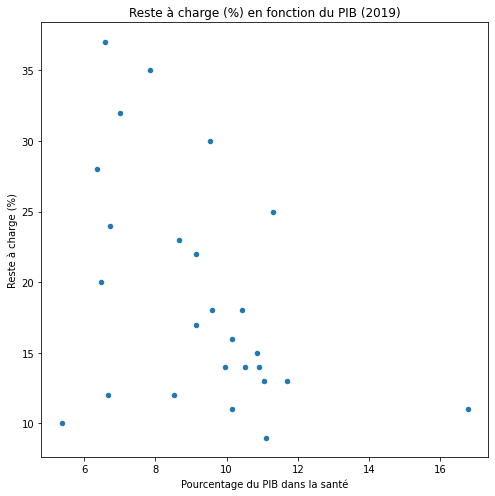

In [102]:
pib_reste_charge_esperance.plot.scatter(x='Pourcentage du PIB dans la santé', y="Reste à charge (%)", figsize=(fig_size, fig_size))
plt.title("Reste à charge (%) en fonction du PIB (2019)")
plt.savefig("img/Reste à charge (%) en fonction du PIB (2019).png")
plt.show()

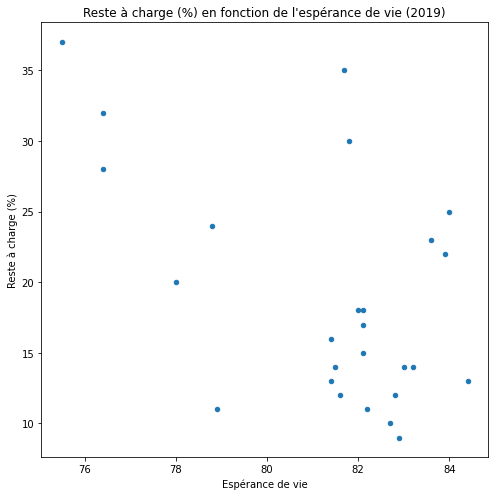

In [103]:
pib_reste_charge_esperance.plot.scatter(x='Espérance de vie', y="Reste à charge (%)", figsize=(fig_size, fig_size))
plt.title("Reste à charge (%) en fonction de l'espérance de vie (2019)")
plt.savefig("img/Reste à charge (%) en fonction de l'espérance de v (2019).png")
plt.show()

### Traitement (regression linéaire, clustering, ...)

In [104]:
X = pourcentage_pib_2019.reshape(-1,1)
Y = reste_charge_2019.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

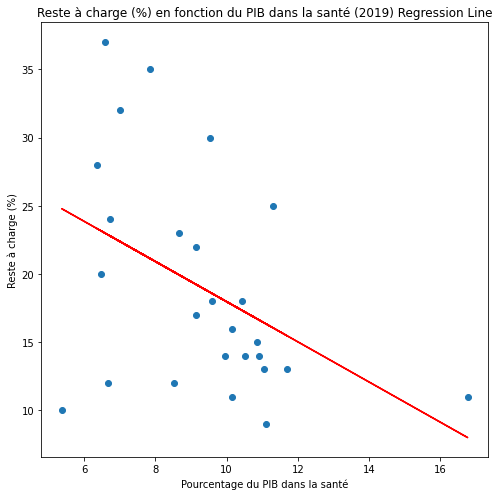

In [105]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Pourcentage du PIB dans la santé")
plt.ylabel("Reste à charge (%)")
plt.title("Reste à charge (%) en fonction du PIB dans la santé (2019) Regression Line")
plt.savefig("img/Reste à charge (%) en fonction du PIB dans la santé (2019) Regression Line")
plt.show()

In [106]:
X = espance_vie_2019.reshape(-1,1)
Y = reste_charge_2019.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

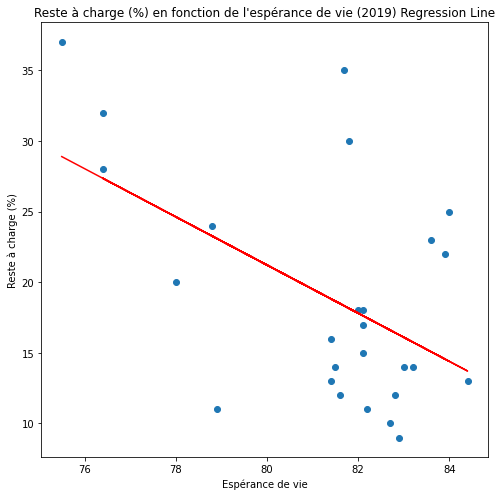

In [107]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Espérance de vie")
plt.ylabel("Reste à charge (%)")
plt.title("Reste à charge (%) en fonction de l'espérance de vie (2019) Regression Line")
plt.savefig("img/Reste à charge (%) en fonction de l'espérance de vie (2019) Regression Line")
plt.show()

#### Clustering  - Reste à charge en fonction du PIB dans la santé

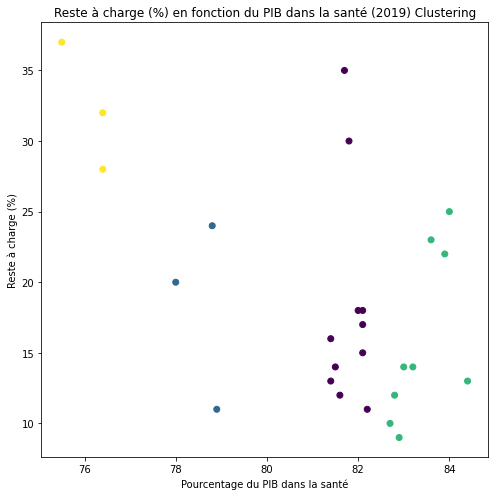

In [108]:
y_pred = KMeans(n_clusters=4, random_state=0).fit_predict(X,Y)
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y, c=y_pred)
plt.xlabel("Pourcentage du PIB dans la santé")
plt.ylabel("Reste à charge (%)")
plt.title("Reste à charge (%) en fonction du PIB dans la santé (2019) Clustering")
plt.savefig("img/Reste à charge (%) en fonction du PIB dans la santé (2019) Clustering")
plt.show()

#### 3D - Reste à charge en fonction du PIB dans la santé et espérance de vie

In [109]:
x = espance_vie_2019.reshape(-1,1)
y = reste_charge_2019.reshape(-1,1)
z = pourcentage_pib_2019.reshape(-1,1)

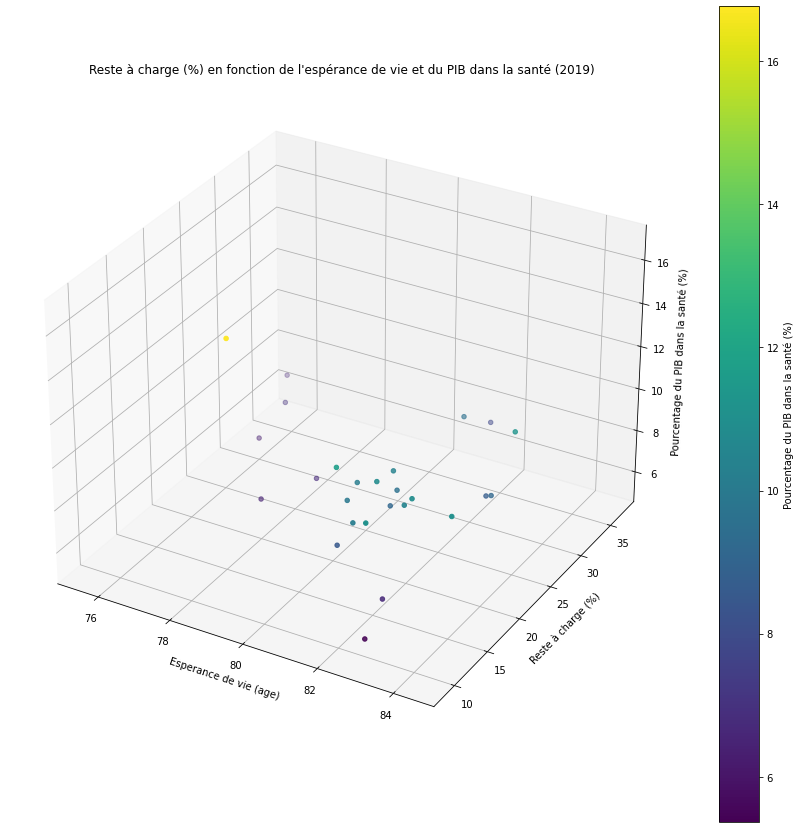

In [110]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
pnt3d= ax.scatter3D(x,y,z,c=z)
ax.set_xlabel('Esperance de vie (age)')
ax.set_ylabel("Reste à charge (%)")
ax.set_zlabel('Pourcentage du PIB dans la santé (%)')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Pourcentage du PIB dans la santé (%)")
plt.title("Reste à charge (%) en fonction de l'espérance de vie et du PIB dans la santé (2019)")
plt.savefig("img/Reste à charge (%) en fonction de l'espérance de vie et du PIB dans la santé (2019) 3d.png")
plt.show()

# Consultation annulé pour coût

In [111]:
### Année qu'on veut récupérer
Annee0 = 2012
Annee1 = 2016

pib_annee0 = pib.loc[pib['AnnΘe'] == Annee0]
pib_annee1 = pib.loc[pib['AnnΘe'] == Annee1]

esperance_annee0 = esperance.loc[esperance['Année'] == Annee0]
esperance_annee1 = esperance.loc[esperance['Année'] == Annee1]

pib_annee0 = pd.pivot_table(pib_annee0,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee0T = pib_annee0.T

pib_annee1 = pd.pivot_table(pib_annee1,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee1T = pib_annee1.T

esperance_annee0 = pd.pivot_table(esperance_annee0,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee0T = esperance_annee0.T

esperance_annee1 = pd.pivot_table(esperance_annee1,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee1T = esperance_annee1.T

### Extraction des données

In [112]:
df = pd.read_csv(r"consult_annul_cout.csv", delimiter=',')
df

COU              Pays     PER  Périodes       IND  \
0   AUS         Australie  TIME12      2012  COSKCOST   
1   AUS         Australie  TIME13      2013  COSKCOST   
2   CAN            Canada  TIME13      2013  COSKCOST   
3   FRA            France  TIME13      2013  COSKCOST   
4   DEU         Allemagne  TIME13      2013  COSKCOST   
..  ...               ...     ...       ...       ...   
67  NLD          Pays-Bas  TIME17      2017  COSKCOST   
68  NZL  Nouvelle-Zélande  TIME16      2016  COSKCOST   
69  POL           Pologne  TIME16      2016  COSKCOST   
70  ESP           Espagne  TIME17      2017  COSKCOST   
71  EST           Estonie  TIME17      2017  COSKCOST   

                                 Indicateur GEN  Genre       AGE  \
0   Consultation annulée pour cause de coût   T  Total  TOTAL_16   
1   Consultation annulée pour cause de coût   T  Total  TOTAL_16   
2   Consultation annulée pour cause de coût   T  Total  TOTAL_16   
3   Consultation annulée pour cause de coût   T  Total  TOTAL_16   
4   Consultation annulée pour cause de coût   T  Total  TOTAL_16   
..                                      ...  ..    ...       ...   
67  Consultation annulée pour cause de coût   T  Total  TOTAL_16   
68  Consultation annulée pour cause de coût   T  Total  TOTAL_16   
69  Consultation annulée pour cause de coût   T  Total  TOTAL_16   
70  Consultation annulée pour cause de coût   T  Total  TOTAL_16   
71  Consultation annulée pour cause de coût   T  Total  TOTAL_16   

      Groupe d'âge               VAL  \
0   16 ans et plus  AS_STD_RATE_CPAT   
1   16 ans et plus  AS_STD_RATE_CPAT   
2   16 ans et plus  AS_STD_RATE_CPAT   
3   16 ans et plus  AS_STD_RATE_CPAT   
4   16 ans et plus  AS_STD_RATE_CPAT   
..             ...               ...   
67  16 ans et plus  AS_STD_RATE_CPAT   
68  16 ans et plus  AS_STD_RATE_CPAT   
69  16 ans et plus  AS_STD_RATE_CPAT   
70  16 ans et plus  AS_STD_RATE_CPAT   
71  16 ans et plus  AS_STD_RATE_CPAT   

                                               Valeur  Value Flag Codes  \
0   Taux standardisé par âge et sexe pour 100 pati...   19.0          B   
1   Taux standardisé par âge et sexe pour 100 pati...   18.8        NaN   
2   Taux standardisé par âge et sexe pour 100 pati...    5.3        NaN   
3   Taux standardisé par âge et sexe pour 100 pati...    8.5        NaN   
4   Taux standardisé par âge et sexe pour 100 pati...    7.6        NaN   
..                                                ...    ...        ...   
67  Taux standardisé par âge et sexe pour 100 pati...    7.3        NaN   
68  Taux standardisé par âge et sexe pour 100 pati...   14.3          B   
69  Taux standardisé par âge et sexe pour 100 pati...    5.1          B   
70  Taux standardisé par âge et sexe pour 100 pati...    2.3          d   
71  Taux standardisé par âge et sexe pour 100 pati...    9.8        NaN   

        Flags  
0     Rupture  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
..        ...  
67        NaN  
68    Rupture  
69    Rupture  
70  Déviation  
71        NaN  

[72 rows x 15 columns]

In [113]:
traitement_annule = df[['Pays','Périodes','Value']]
traitement_annule0 = traitement_annule.loc[traitement_annule['Périodes'] == Annee0]
traitement_annule1 = traitement_annule.loc[traitement_annule['Périodes'] == Annee1]
traitement_annule

Pays  Périodes  Value
0          Australie      2012   19.0
1          Australie      2013   18.8
2             Canada      2013    5.3
3             France      2013    8.5
4          Allemagne      2013    7.6
..               ...       ...    ...
67          Pays-Bas      2017    7.3
68  Nouvelle-Zélande      2016   14.3
69           Pologne      2016    5.1
70           Espagne      2017    2.3
71           Estonie      2017    9.8

[72 rows x 3 columns]

In [114]:
traitement_annule_T = pd.pivot_table(traitement_annule,index='Pays',columns='Périodes',values='Value', fill_value=0)
traitement_annuleT = traitement_annule_T.T

traitement_annule0 = pd.pivot_table(traitement_annule0,index='Pays',columns='Périodes',values='Value', fill_value=0)
traitement_annule0T = traitement_annule0.T

traitement_annule1 = pd.pivot_table(traitement_annule1,index='Pays',columns='Périodes',values='Value', fill_value=0)
traitement_annule1T = traitement_annule1.T

traitement_annuleT

Pays      Allemagne  Australie  Autriche  Canada  Corée  Espagne  Estonie  \
Périodes                                                                    
2005            0.0        0.0       1.1     0.0    0.0      0.0      0.0   
2006            0.0        0.0       1.0     0.0    0.0      0.0      5.4   
2007            0.0        0.0       1.3     0.0    0.0      0.0      7.4   
2008            0.0        0.0       1.5     0.0    0.0      0.0      6.1   
2009            0.0        0.0       0.9     0.0    0.0      0.0      9.3   
2010           16.7       13.1       1.7     4.4    0.0      0.0     16.1   
2011            0.0        0.0       1.2     0.0    0.0      0.0     13.7   
2012            0.0       19.0       1.1     0.0    0.0      0.0     16.5   
2013            7.6       18.8       1.2     5.3    0.0      0.0     16.5   
2014            0.0       16.9       0.0     0.0    0.0      2.8     11.2   
2015            0.0       16.1       0.0     0.0    0.0      0.0     10.1   
2016            2.8        8.9       0.0     6.4    0.0      0.0     11.0   
2017            0.0        0.0       0.0     0.0    0.0      2.3      9.8   
2018            0.0        0.0       0.0     0.0    2.8      0.0      0.0   

Pays      France  Islande  Israël  ...  Norvège  Nouvelle-Zélande  Pays-Bas  \
Périodes                           ...                                        
2005         0.0      0.0     0.0  ...      0.0               0.0       0.0   
2006         0.0      0.0     0.0  ...      0.0               0.0       0.0   
2007         0.0      0.0     0.0  ...      0.0               0.0       0.0   
2008         0.0      0.0     0.0  ...      0.0               0.0       0.0   
2009         0.0      4.4     0.0  ...      0.0               0.0       0.0   
2010         6.0      0.0     0.0  ...      5.6               9.4       1.9   
2011         0.0      0.0     0.0  ...      0.0              14.0       0.0   
2012         0.0      7.0     0.0  ...      0.0               0.0       0.0   
2013         8.5      0.0     0.0  ...      5.0              14.2      12.1   
2014         0.0      0.0     0.0  ...      0.0              13.9       0.0   
2015         0.0      0.0     0.0  ...      0.0              14.4       0.0   
2016         0.0      0.0     3.8  ...      5.4              14.3       6.0   
2017         0.0      0.0     0.0  ...      0.0               0.0       7.3   
2018         0.0      0.0     0.0  ...      0.0               0.0       0.0   

Pays      Pologne  Portugal  Royaume-Uni  République tchèque  Suisse  Suède  \
Périodes                                                                      
2005          0.0       0.0          0.0                 0.0     0.0    0.0   
2006          0.0       0.0          0.0                 0.0     0.0    0.0   
2007          0.0       0.0          0.0                 0.0     0.0    0.0   
2008          0.0       0.0          0.0                 0.0     0.0    0.0   
2009          0.0       0.0          0.0                 0.0     0.0    0.0   
2010         23.1       0.0          2.5                 7.9     6.5    4.9   
2011          0.0       0.0          0.0                 0.0     0.0    0.0   
2012          0.0       0.0          0.0                 0.0     0.0    0.0   
2013         34.5       0.0          2.1                 0.0     6.6    3.2   
2014          0.0       0.0          0.0                 0.0     0.0    0.0   
2015          0.0       8.4          0.0                 0.0     0.0    0.0   
2016          5.1       0.0          3.8                 0.0    19.6    3.5   
2017          0.0       0.0          0.0                 0.0     0.0    0.0   
2018          0.0       0.0          0.0                 0.0     0.0    0.0   

Pays      États-Unis  
Périodes              
2005             0.0  
2006             0.0  
2007             0.0  
2008             0.0  
2009             0.0  
2010            22.3  
2011             0.0  
2012             0.0  
2013   

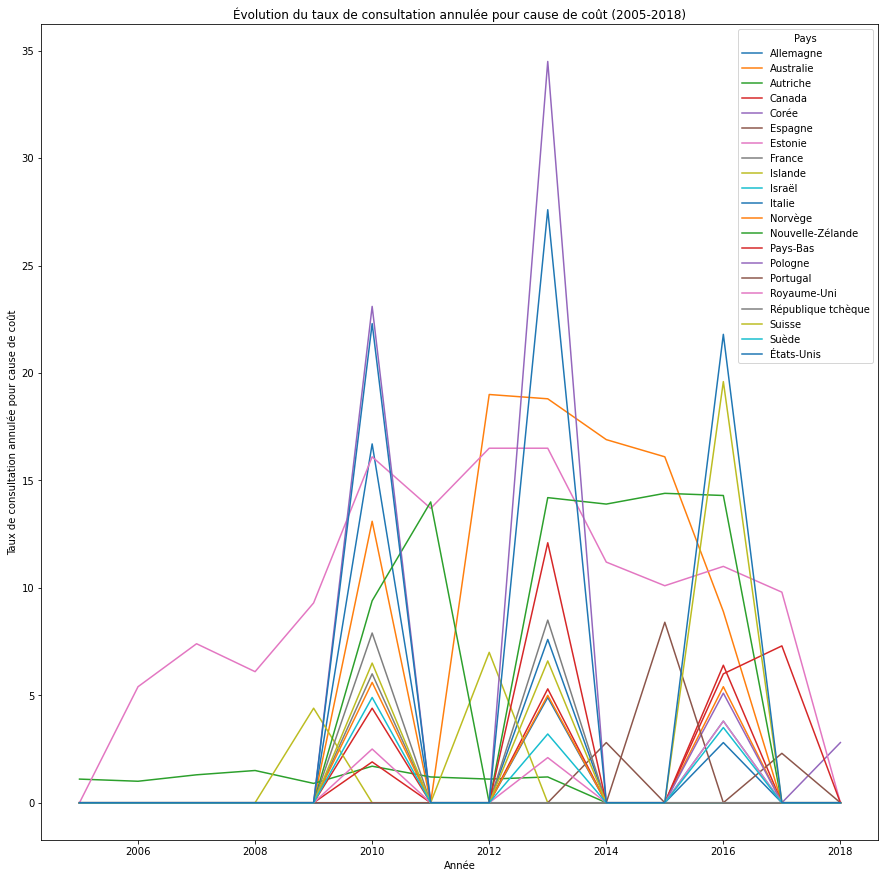

In [115]:
traitement_annuleT.plot(figsize=(15, 15))
plt.xlabel("Année")
plt.ylabel("Taux de consultation annulée pour cause de coût")
plt.title("Évolution du taux de consultation annulée pour cause de coût (2005-2018)")
plt.savefig("img/Évolution du taux de consultation annulée pour cause de coût (2005-2018).png")
plt.show()

### Traitement (regression linéaire, clustering, ...)

#### taux de consulation annulée en fonction du PIB

In [116]:
traitement_annule1T

Pays      Allemagne  Australie  Canada  Estonie  Israël  Norvège  \
Périodes                                                           
2016            2.8        8.9     6.4     11.0     3.8      5.4   

Pays      Nouvelle-Zélande  Pays-Bas  Pologne  Royaume-Uni  Suisse  Suède  \
Périodes                                                                    
2016                  14.3       6.0      5.1          3.8    19.6    3.5   

Pays      États-Unis  
Périodes              
2016            21.8

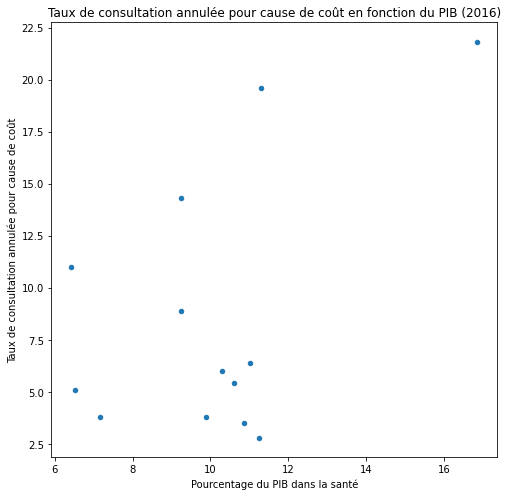

In [117]:
pib_taux_consult = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee1T.iloc[0],
   "Taux de consultation annulée pour cause de coût": traitement_annule1T.iloc[0]
   })

pib_taux_consult.plot.scatter(x='Pourcentage du PIB dans la santé', y="Taux de consultation annulée pour cause de coût", figsize=(fig_size, fig_size))
plt.title("Taux de consultation annulée pour cause de coût en fonction du PIB (%d)" % Annee1)
plt.savefig("img/Taux de consultation annulée pour cause de coût en fonction du PIB (%d).png" % Annee1)
plt.show()

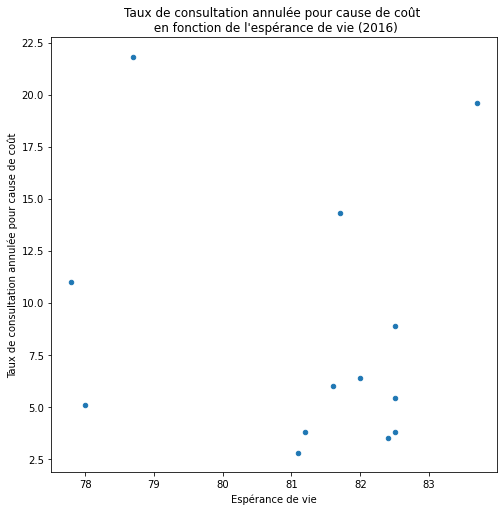

In [118]:
esperance_taux_consult = pd.DataFrame({
   'Espérance de vie': esperance_annee1T.iloc[0],
   "Taux de consultation annulée pour cause de coût": traitement_annule1T.iloc[0]
   })

esperance_taux_consult.plot.scatter(x='Espérance de vie', y="Taux de consultation annulée pour cause de coût", figsize=(fig_size, fig_size))
plt.title("Taux de consultation annulée pour cause de coût \n en fonction de l'espérance de vie (%d)" % Annee1)
plt.savefig("img/Taux de consultation annulée pour cause de coût en fonction de l'espérance de vie (%d).png" % Annee1)
plt.show()

#### Regression Line  - taux de consulation annulée en fonction du PIB 

In [119]:
# manip nécessaire, on possède 44 PIB mais que 39 données sur la mortalité prevention, on supprime les pib dont on n'a pas les mortalités
esperance_format_taux_consult_annee1  = esperance_annee1T[esperance_annee1T.columns.intersection(traitement_annule1T.columns.values)]
esperance_format_taux_consult_annee1

Pays   Allemagne  Australie  Canada  Estonie  Israël  Norvège  \
Année                                                           
2016        81.1       82.5    82.0     77.8    82.5     82.5   

Pays   Nouvelle-Zélande  Pays-Bas  Pologne  Royaume-Uni  Suisse  Suède  \
Année                                                                    
2016               81.7      81.6     78.0         81.2    83.7   82.4   

Pays   États-Unis  
Année              
2016         78.7

In [120]:
X = esperance_format_taux_consult_annee1.iloc[0].values.reshape(-1,1)
Y = traitement_annule1T.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

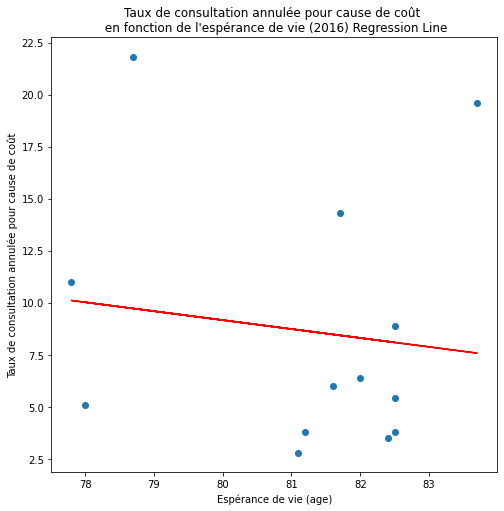

In [121]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Espérance de vie (age)")
plt.ylabel("Taux de consultation annulée pour cause de coût")
plt.title("Taux de consultation annulée pour cause de coût \n en fonction de l'espérance de vie (%d) Regression Line" % Annee1)
plt.savefig("img/Taux de consultation annulée pour cause de coût en fonction de l'espérance de vie (%d) Regression Line.png" % Annee1)
plt.show()

In [122]:
# manip nécessaire, on possède 44 PIB mais que 39 données sur la mortalité prevention, on supprime les pib dont on n'a pas les mortalités
pib_format_taux_consult_annee1  = pib_annee1T[pib_annee1T.columns.intersection(traitement_annule1T.columns.values)]
pib_format_taux_consult_annee1

Pays   Allemagne  Australie  Canada  Estonie  Israël  Norvège  \
AnnΘe                                                           
2016      11.236      9.248  11.023     6.43   7.173   10.591   

Pays   Nouvelle-Zélande  Pays-Bas  Pologne  Royaume-Uni  Suisse   Suède  \
AnnΘe                                                                     
2016              9.239    10.294    6.535        9.873    11.3  10.852   

Pays   États-Unis  
AnnΘe              
2016       16.844

In [123]:
X = pib_format_taux_consult_annee1.iloc[0].values.reshape(-1,1)
Y = traitement_annule1T.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

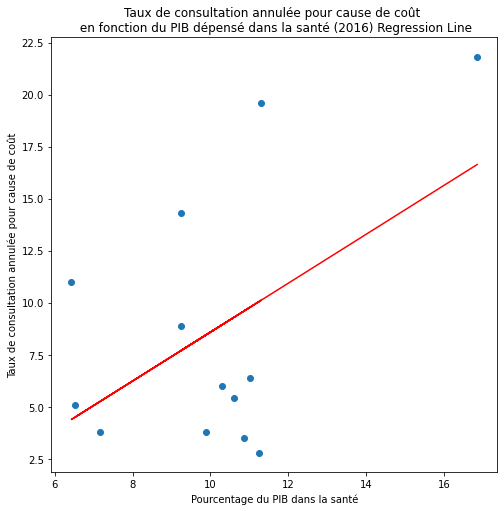

In [124]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Pourcentage du PIB dans la santé")
plt.ylabel("Taux de consultation annulée pour cause de coût")
plt.title("Taux de consultation annulée pour cause de coût \n en fonction du PIB dépensé dans la santé (%d) Regression Line" % Annee1)
plt.savefig("img/Taux de consultation annulée pour cause de coût en fonction du PIB dépensé dans la santé (%d) Regression Line.png" % Annee1)
plt.show()

# Traitement annulé

In [125]:
### Année qu'on veut récupérer
Annee0 = 2010
Annee1 = 2016

pib_annee0 = pib.loc[pib['AnnΘe'] == Annee0]
pib_annee1 = pib.loc[pib['AnnΘe'] == Annee1]

esperance_annee0 = esperance.loc[esperance['Année'] == Annee0]
esperance_annee1 = esperance.loc[esperance['Année'] == Annee1]

pib_annee0 = pd.pivot_table(pib_annee0,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee0T = pib_annee0.T

pib_annee1 = pd.pivot_table(pib_annee1,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee1T = pib_annee1.T

esperance_annee0 = pd.pivot_table(esperance_annee0,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee0T = esperance_annee0.T

esperance_annee1 = pd.pivot_table(esperance_annee1,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee1T = esperance_annee1.T

### Extraction des données

In [126]:
df = pd.read_csv(r"traitement_annul_cout.csv", delimiter=',')
df

COU                Pays     PER  Périodes       IND  \
0   AUS           Australie  TIME12      2012  MTSKCOST   
1   AUS           Australie  TIME13      2013  MTSKCOST   
2   CAN              Canada  TIME13      2013  MTSKCOST   
3   FRA              France  TIME13      2013  MTSKCOST   
4   DEU           Allemagne  TIME13      2013  MTSKCOST   
5   ITA              Italie  TIME13      2013  MTSKCOST   
6   NLD            Pays-Bas  TIME13      2013  MTSKCOST   
7   NOR             Norvège  TIME13      2013  MTSKCOST   
8   POL             Pologne  TIME13      2013  MTSKCOST   
9   PRT            Portugal  TIME15      2015  MTSKCOST   
10  SWE               Suède  TIME13      2013  MTSKCOST   
11  CHE              Suisse  TIME13      2013  MTSKCOST   
12  GBR         Royaume-Uni  TIME13      2013  MTSKCOST   
13  USA          États-Unis  TIME13      2013  MTSKCOST   
14  ISR              Israël  TIME05      2005  MTSKCOST   
15  ISR              Israël  TIME07      2007  MTSKCOST   
16  ISR              Israël  TIME09      2009  MTSKCOST   
17  ISR              Israël  TIME12      2012  MTSKCOST   
18  AUS           Australie  TIME10      2010  MTSKCOST   
19  AUS           Australie  TIME14      2014  MTSKCOST   
20  AUS           Australie  TIME15      2015  MTSKCOST   
21  CAN              Canada  TIME10      2010  MTSKCOST   
22  CAN              Canada  TIME16      2016  MTSKCOST   
23  CZE  République tchèque  TIME10      2010  MTSKCOST   
24  FRA              France  TIME10      2010  MTSKCOST   
25  DEU           Allemagne  TIME10      2010  MTSKCOST   
26  DEU           Allemagne  TIME16      2016  MTSKCOST   
27  NLD            Pays-Bas  TIME10      2010  MTSKCOST   
28  NLD            Pays-Bas  TIME16      2016  MTSKCOST   
29  NZL    Nouvelle-Zélande  TIME10      2010  MTSKCOST   
30  NZL    Nouvelle-Zélande  TIME16      2016  MTSKCOST   
31  NOR             Norvège  TIME10      2010  MTSKCOST   
32  NOR             Norvège  TIME16      2016  MTSKCOST   
33  SWE               Suède  TIME10      2010  MTSKCOST   
34  SWE               Suède  TIME16      2016  MTSKCOST   
35  CHE              Suisse  TIME10      2010  MTSKCOST   
36  CHE              Suisse  TIME16      2016  MTSKCOST   
37  GBR         Royaume-Uni  TIME10      2010  MTSKCOST   
38  GBR         Royaume-Uni  TIME16      2016  MTSKCOST   
39  USA          États-Unis  TIME10      2010  MTSKCOST   
40  USA          États-Unis  TIME16      2016  MTSKCOST   
41  ISR              Israël  TIME14      2014  MTSKCOST   
42  ISR              Israël  TIME16      2016  MTSKCOST   
43  AUS           Australie  TIME16      2016  MTSKCOST   
44  KOR               Corée  TIME18      2018  MTSKCOST   
45  NLD            Pays-Bas  TIME17      2017  MTSKCOST   
46  POL             Pologne  TIME16      2016  MTSKCOST   

                                           Indicateur GEN  Genre       AGE  \
0   Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
1   Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
2   Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
3   Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
4   Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
5   Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
6   Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
7   Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
8   Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
9   Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
10  Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
11  Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
12  Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
13  Test médical, traitement ou suivi annulés pour...   T  Total  TOTAL_16   
1

In [127]:
consult_annule = df[['Pays','Périodes','Value']]
consult_annule_annee0 = consult_annule.loc[consult_annule['Périodes'] == Annee0]
consult_annule_annee1 = consult_annule.loc[consult_annule['Périodes'] == Annee1]
consult_annule

Pays  Périodes  Value
0            Australie      2012    4.9
1            Australie      2013    3.2
2               Canada      2013    5.6
3               France      2013    9.2
4            Allemagne      2013    5.3
5               Italie      2013    3.2
6             Pays-Bas      2013   16.3
7              Norvège      2013    5.1
8              Pologne      2013   21.5
9             Portugal      2015   11.3
10               Suède      2013    2.1
11              Suisse      2013    7.0
12         Royaume-Uni      2013    2.4
13          États-Unis      2013   21.5
14              Israël      2005    8.1
15              Israël      2007    6.2
16              Israël      2009    7.6
17              Israël      2012    4.9
18           Australie      2010   13.9
19           Australie      2014    3.1
20           Australie      2015    3.6
21              Canada      2010    5.3
22              Canada      2016    5.8
23  République tchèque      2010   10.0
24              France      2010    6.2
25           Allemagne      2010    9.7
26           Allemagne      2016    4.7
27            Pays-Bas      2010    2.8
28            Pays-Bas      2016    7.0
29    Nouvelle-Zélande      2010    8.4
30    Nouvelle-Zélande      2016    9.7
31             Norvège      2010    5.5
32             Norvège      2016    3.9
33               Suède      2010    3.9
34               Suède      2016    3.3
35              Suisse      2010    4.7
36              Suisse      2016   12.5
37         Royaume-Uni      2010    3.0
38         Royaume-Uni      2016    2.8
39          États-Unis      2010   21.9
40          États-Unis      2016   19.5
41              Israël      2014    4.7
42              Israël      2016    3.0
43           Australie      2016    7.7
44               Corée      2018    5.5
45            Pays-Bas      2017    5.5
46             Pologne      2016    0.8

In [128]:
consult_annule_T = pd.pivot_table(consult_annule,index='Pays',columns='Périodes',values='Value', fill_value=0)
consult_annuleT = consult_annule_T.T

consult_annule_annee0 = pd.pivot_table(consult_annule_annee0,index='Pays',columns='Périodes',values='Value', fill_value=0)
consult_annule_annee0T = consult_annule_annee0.T

consult_annule_annee1 = pd.pivot_table(consult_annule_annee1,index='Pays',columns='Périodes',values='Value', fill_value=0)
consult_annule_annee1T = consult_annule_annee1.T

consult_annuleT

Pays      Allemagne  Australie  Canada  Corée  France  Israël  Italie  \
Périodes                                                                
2005            0.0        0.0     0.0    0.0     0.0     8.1     0.0   
2007            0.0        0.0     0.0    0.0     0.0     6.2     0.0   
2009            0.0        0.0     0.0    0.0     0.0     7.6     0.0   
2010            9.7       13.9     5.3    0.0     6.2     0.0     0.0   
2012            0.0        4.9     0.0    0.0     0.0     4.9     0.0   
2013            5.3        3.2     5.6    0.0     9.2     0.0     3.2   
2014            0.0        3.1     0.0    0.0     0.0     4.7     0.0   
2015            0.0        3.6     0.0    0.0     0.0     0.0     0.0   
2016            4.7        7.7     5.8    0.0     0.0     3.0     0.0   
2017            0.0        0.0     0.0    0.0     0.0     0.0     0.0   
2018            0.0        0.0     0.0    5.5     0.0     0.0     0.0   

Pays      Norvège  Nouvelle-Zélande  Pays-Bas  Pologne  Portugal  Royaume-Uni  \
Périodes                                                                        
2005          0.0               0.0       0.0      0.0       0.0          0.0   
2007          0.0               0.0       0.0      0.0       0.0          0.0   
2009          0.0               0.0       0.0      0.0       0.0          0.0   
2010          5.5               8.4       2.8      0.0       0.0          3.0   
2012          0.0               0.0       0.0      0.0       0.0          0.0   
2013          5.1               0.0      16.3     21.5       0.0          2.4   
2014          0.0               0.0       0.0      0.0       0.0          0.0   
2015          0.0               0.0       0.0      0.0      11.3          0.0   
2016          3.9               9.7       7.0      0.8       0.0          2.8   
2017          0.0               0.0       5.5      0.0       0.0          0.0   
2018          0.0               0.0       0.0      0.0       0.0          0.0   

Pays      République tchèque  Suisse  Suède  États-Unis  
Périodes                                                 
2005                     0.0     0.0    0.0         0.0  
2007                     0.0     0.0    0.0         0.0  
2009                     0.0     0.0    0.0         0.0  
2010                    10.0     4.7    3.9        21.9  
2012                     0.0     0.0    0.0         0.0  
2013                     0.0     7.0    2.1        21.5  
2014                     0.0     0.0    0.0         0.0  
2015                     0.0     0.0    0.0         0.0  
2016                     0.0    12.5    3.3        19.5  
2017                     0.0     0.0    0.0         0.0  
2018                     0.0     0.0    0.0         0.0

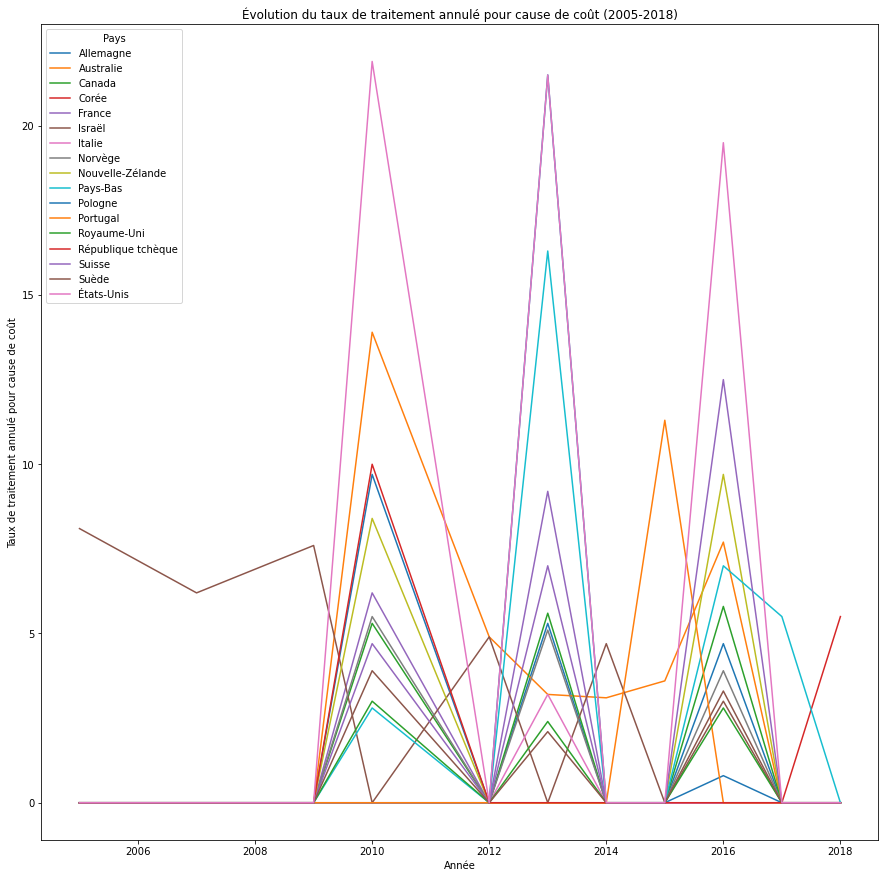

In [129]:
consult_annuleT.plot(figsize=(15, 15))
plt.xlabel("Année")
plt.ylabel("Taux de traitement annulé pour cause de coût")
plt.title("Évolution du taux de traitement annulé pour cause de coût (2005-2018)")
plt.savefig("img/Évolution du taux de traitement annulé pour cause de coût (2005-2018).png")
plt.show()

### Traitement (regression linéaire, clustering, ...)

#### traitement annulé en fonction du PIB

In [130]:
consult_annule_annee1T

Pays      Allemagne  Australie  Canada  Israël  Norvège  Nouvelle-Zélande  \
Périodes                                                                    
2016            4.7        7.7     5.8     3.0      3.9               9.7   

Pays      Pays-Bas  Pologne  Royaume-Uni  Suisse  Suède  États-Unis  
Périodes                                                             
2016           7.0      0.8          2.8    12.5    3.3        19.5

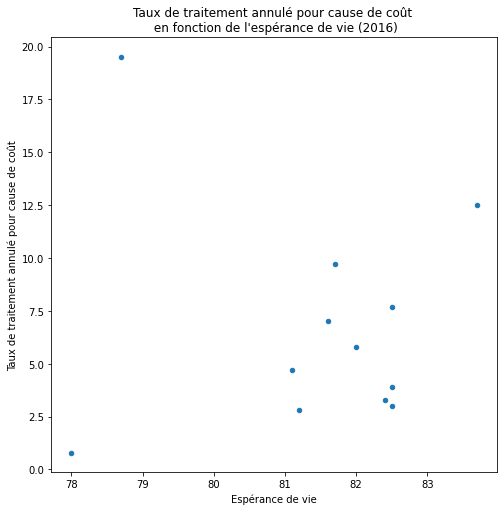

In [131]:
esperance_taux_traitement = pd.DataFrame({
   'Espérance de vie': esperance_annee1T.iloc[0],
   "Taux de traitement annulé pour cause de coût": consult_annule_annee1T.iloc[0]
   })

esperance_taux_traitement.plot.scatter(x='Espérance de vie', y="Taux de traitement annulé pour cause de coût", figsize=(fig_size, fig_size))
plt.title("Taux de traitement annulé pour cause de coût \n en fonction de l'espérance de vie (%d)" % Annee1)
plt.savefig("img/Taux de traitement annulé pour cause de coût en fonction de l'espérance de vie (%d).png" % Annee1)
plt.show()

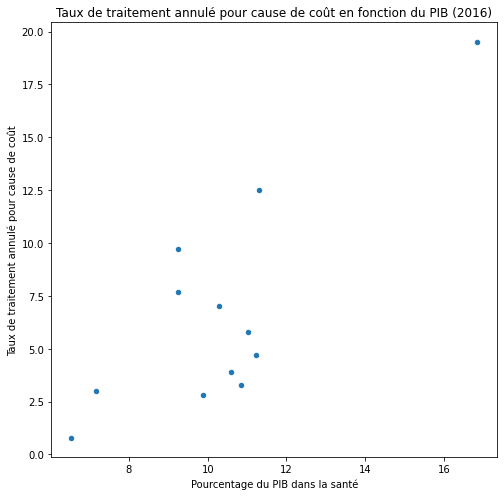

In [132]:
pib_taux_traitement = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee1T.iloc[0],
   "Taux de traitement annulé pour cause de coût": consult_annule_annee1T.iloc[0]
   })

pib_taux_traitement.plot.scatter(x='Pourcentage du PIB dans la santé', y="Taux de traitement annulé pour cause de coût", figsize=(fig_size, fig_size))
plt.title("Taux de traitement annulé pour cause de coût en fonction du PIB (%d)" % Annee1)
plt.savefig("img/Taux de traitement annulé pour cause de coût en fonction du PIB (%d).png" % Annee1)
plt.show()

#### Regression Line  - taux de traitement annulé en fonction du PIB 

In [133]:
# manip nécessaire, on possède 44 PIB mais que 39 données sur la mortalité prevention, on supprime les pib dont on n'a pas les mortalités
esperance_format_taux_traitement_annee1  = esperance_annee1T[esperance_annee1T.columns.intersection(consult_annule_annee1T.columns.values)]
esperance_format_taux_traitement_annee1

Pays   Allemagne  Australie  Canada  Israël  Norvège  Nouvelle-Zélande  \
Année                                                                    
2016        81.1       82.5    82.0    82.5     82.5              81.7   

Pays   Pays-Bas  Pologne  Royaume-Uni  Suisse  Suède  États-Unis  
Année                                                             
2016       81.6     78.0         81.2    83.7   82.4        78.7

In [134]:
X = esperance_format_taux_traitement_annee1.iloc[0].values.reshape(-1,1)
Y = consult_annule_annee1T.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

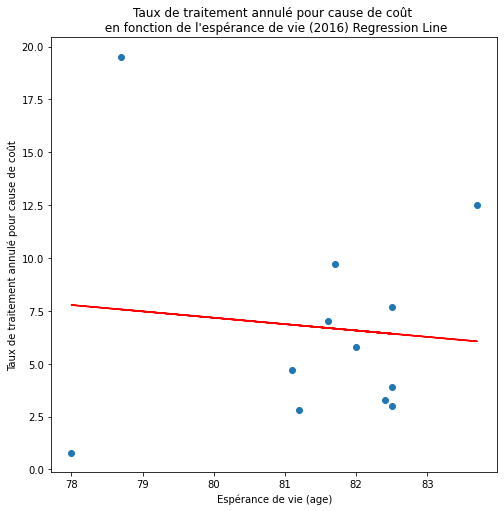

In [135]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Espérance de vie (age)")
plt.ylabel("Taux de traitement annulé pour cause de coût")
plt.title("Taux de traitement annulé pour cause de coût \n en fonction de l'espérance de vie (%d) Regression Line" % Annee1)
plt.savefig("img/Taux de traitement annulé pour cause de coût en fonction de l'espérance de vie (%d) Regression Line.png" % Annee1)
plt.show()

In [136]:
# manip nécessaire, on possède 44 PIB mais que 39 données sur la mortalité prevention, on supprime les pib dont on n'a pas les mortalités
pib_format_taux_traitement_annee1  = pib_annee1T[pib_annee1T.columns.intersection(consult_annule_annee1T.columns.values)]
pib_format_taux_traitement_annee1

Pays   Allemagne  Australie  Canada  Israël  Norvège  Nouvelle-Zélande  \
AnnΘe                                                                    
2016      11.236      9.248  11.023   7.173   10.591             9.239   

Pays   Pays-Bas  Pologne  Royaume-Uni  Suisse   Suède  États-Unis  
AnnΘe                                                              
2016     10.294    6.535        9.873    11.3  10.852      16.844

In [137]:
X = pib_format_taux_traitement_annee1.iloc[0].values.reshape(-1,1)
Y = consult_annule_annee1T.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

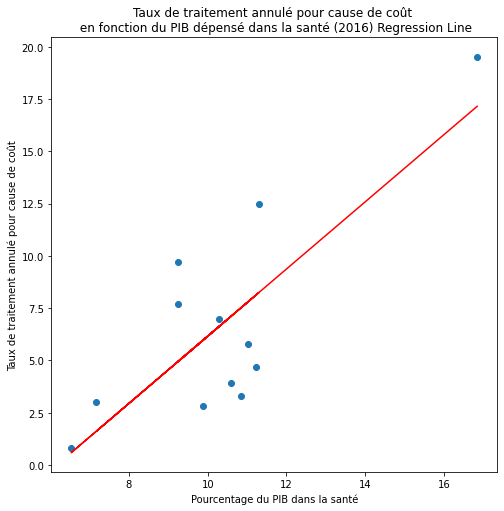

In [138]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Pourcentage du PIB dans la santé")
plt.ylabel("Taux de traitement annulé pour cause de coût")
plt.title("Taux de traitement annulé pour cause de coût \n en fonction du PIB dépensé dans la santé (%d) Regression Line" % Annee1)
plt.savefig("img/Taux de traitement annulé pour cause de coût en fonction du PIB dépensé dans la santé (%d) Regression Line.png" % Annee1)
plt.show()

# Infra

In [139]:
### Année qu'on veut récupérer
Annee0 = 2010
Annee1 = 2017

pib_annee0 = pib.loc[pib['AnnΘe'] == Annee0]
pib_annee1 = pib.loc[pib['AnnΘe'] == Annee1]

esperance_annee0 = esperance.loc[esperance['Année'] == Annee0]
esperance_annee1 = esperance.loc[esperance['Année'] == Annee1]

pib_annee0 = pd.pivot_table(pib_annee0,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee0T = pib_annee0.T

pib_annee1 = pd.pivot_table(pib_annee1,index='Pays',columns='AnnΘe',values='Value', fill_value=0)
pib_annee1T = pib_annee1.T

esperance_annee0 = pd.pivot_table(esperance_annee0,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee0T = esperance_annee0.T

esperance_annee1 = pd.pivot_table(esperance_annee1,index='Pays',columns='Année',values='Value', fill_value=0)
esperance_annee1T = esperance_annee1.T

### Extraction des données

In [140]:
df = pd.read_csv(r"infarctus_aigu.csv", delimiter=',')
df

COU       Pays     PER  Périodes       IND  \
0    CAN     Canada  TIME02      2002  MORTAMIO   
1    CAN     Canada  TIME03      2003  MORTAMIO   
2    CAN     Canada  TIME04      2004  MORTAMIO   
3    CAN     Canada  TIME05      2005  MORTAMIO   
4    CAN     Canada  TIME06      2006  MORTAMIO   
..   ...        ...     ...       ...       ...   
361  ROU   Roumanie  TIME20      2020  MORTAMIO   
362  SGP  Singapour  TIME18      2018  MORTAMIO   
363  SGP  Singapour  TIME19      2019  MORTAMIO   
364  SVN   Slovénie  TIME18      2018  MORTAMIO   
365  SVN   Slovénie  TIME19      2019  MORTAMIO   

                                            Indicateur GEN  Genre       AGE  \
0    Mortalité à 30 jours après admission pour infa...   T  Total  TOTAL_45   
1    Mortalité à 30 jours après admission pour infa...   T  Total  TOTAL_45   
2    Mortalité à 30 jours après admission pour infa...   T  Total  TOTAL_45   
3    Mortalité à 30 jours après admission pour infa...   T  Total  TOTAL_45   
4    Mortalité à 30 jours après admission pour infa...   T  Total  TOTAL_45   
..                                                 ...  ..    ...       ...   
361  Mortalité à 30 jours après admission pour infa...   T  Total  TOTAL_45   
362  Mortalité à 30 jours après admission pour infa...   T  Total  TOTAL_45   
363  Mortalité à 30 jours après admission pour infa...   T  Total  TOTAL_45   
364  Mortalité à 30 jours après admission pour infa...   T  Total  TOTAL_45   
365  Mortalité à 30 jours après admission pour infa...   T  Total  TOTAL_45   

       Groupe d'âge               VAL  \
0    45 ans et plus  AS_STD_RATE_CPAT   
1    45 ans et plus  AS_STD_RATE_CPAT   
2    45 ans et plus  AS_STD_RATE_CPAT   
3    45 ans et plus  AS_STD_RATE_CPAT   
4    45 ans et plus  AS_STD_RATE_CPAT   
..              ...               ...   
361  45 ans et plus  AS_STD_RATE_CPAT   
362  45 ans et plus  AS_STD_RATE_CPAT   
363  45 ans et plus  AS_STD_RATE_CPAT   
364  45 ans et plus  AS_STD_RATE_CPAT   
365  45 ans et plus  AS_STD_RATE_CPAT   

                                                Valeur  Value Flag Codes Flags  
0    Taux standardisé par âge et sexe pour 100 pati...   11.0        NaN   NaN  
1    Taux standardisé par âge et sexe pour 100 pati...   10.8        NaN   NaN  
2    Taux standardisé par âge et sexe pour 100 pati...   10.5        NaN   NaN  
3    Taux standardisé par âge et sexe pour 100 pati...   10.1        NaN   NaN  
4    Taux standardisé par âge et sexe pour 100 pati...    9.9        NaN   NaN  
..                                                 ...    ...        ...   ...  
361  Taux standardisé par âge et sexe pour 100 pati...    5.2        NaN   NaN  
362  Taux standardisé par âge et sexe pour 100 pati...   13.1        NaN   NaN  
363  Taux standardisé par âge et sexe pour 100 pati...   13.3        NaN   NaN  
364  Taux standardisé par âge et sexe pour 100 pati...    7.0        NaN   NaN  
365  Taux standardisé par âge et sexe pour 100 pati...    6.4        NaN   NaN  

[366 rows x 15 columns]

In [141]:
infra = df[['Pays','Périodes','Value']]
infra0 = infra.loc[infra['Périodes'] == Annee0]
infra1 = infra.loc[infra['Périodes'] == Annee1]
infra

Pays  Périodes  Value
0       Canada      2002   11.0
1       Canada      2003   10.8
2       Canada      2004   10.5
3       Canada      2005   10.1
4       Canada      2006    9.9
..         ...       ...    ...
361   Roumanie      2020    5.2
362  Singapour      2018   13.1
363  Singapour      2019   13.3
364   Slovénie      2018    7.0
365   Slovénie      2019    6.4

[366 rows x 3 columns]

In [142]:
infra_T = pd.pivot_table(infra,index='Pays',columns='Périodes',values='Value', fill_value=0)
infraT = infra_T.T

infra0 = pd.pivot_table(infra0,index='Pays',columns='Périodes',values='Value', fill_value=0)
infra0T = infra0.T

infra1 = pd.pivot_table(infra1,index='Pays',columns='Périodes',values='Value', fill_value=0)
infra1T = infra1.T

infraT

Pays      Canada  Chili  Colombie  Corée  Danemark  Espagne  Estonie  \
Périodes                                                               
2000         0.0    0.0       0.0    0.0       0.0     14.5      0.0   
2001         0.0    0.0       0.0    0.0       0.0     13.2      0.0   
2002        11.0    0.0       0.0    0.0       0.0     12.8      0.0   
2003        10.8    0.0       0.0    0.0       0.0     12.3      0.0   
2004        10.5    0.0       0.0    0.0       0.0     11.5      0.0   
2005        10.1    0.0       0.0    0.0       0.0     11.2      0.0   
2006         9.9    0.0       0.0    0.0      12.7     10.4      0.0   
2007         9.1    0.0       0.0    0.0      12.2     10.2      0.0   
2008         8.6   19.1       0.0   14.2      10.1     10.0      0.0   
2009         8.2   18.4      13.4   12.9      11.1      9.3      0.0   
2010         7.7   16.8      12.3   12.2      10.5      9.3      0.0   
2011         7.4   16.8      12.8   10.9       9.3      9.0      0.0   
2012         7.0   17.9      12.0   10.8       9.5      8.5     13.8   
2013         6.9   15.9      13.8   10.6       8.6      8.2     13.6   
2014         7.1   15.7      13.2   10.3       7.7      8.0     12.4   
2015         7.0   13.4      12.7   10.2       7.4      8.1     13.9   
2016         6.6   13.0      12.0   12.1       7.5      7.7     12.3   
2017         6.9   12.6      11.1   12.1       7.2      7.2     12.3   
2018         6.7   11.4       0.0   11.2       6.7      7.5     11.8   
2019         6.4   10.7       0.0   11.0       6.8      7.1     12.7   
2020         0.0    0.0       0.0    0.0       0.0      0.0      0.0   

Pays      Finlande  France  Hongrie  ...  Roumanie  Royaume-Uni  \
Périodes                             ...                          
2000           0.0     0.0      0.0  ...       0.0          0.0   
2001           0.0     0.0      0.0  ...       0.0          0.0   
2002           0.0     0.0      0.0  ...       0.0          0.0   
2003           0.0     0.0      0.0  ...       0.0          0.0   
2004           0.0     0.0     21.6  ...       0.0          0.0   
2005          15.3     0.0     21.5  ...       0.0          0.0   
2006          14.7     0.0     20.9  ...       0.0          0.0   
2007          14.9     0.0     20.4  ...       0.0          0.0   
2008          13.7     0.0     19.1  ...       0.0         11.9   
2009          13.7     0.0     18.8  ...       0.0         10.9   
2010          13.0     0.0      0.0  ...       0.0         10.6   
2011          12.4     0.0      0.0  ...       0.0          9.4   
2012          11.8     0.0      0.0  ...       0.0          9.3   
2013          10.9     9.1      0.0  ...       0.0          9.1   
2014           9.9     8.8      0.0  ...       6.8          9.0   
2015          10.1     8.6      0.0  ...       6.6          8.6   
2016           9.7     7.3      0.0  ...       5.7          9.0   
2017           9.0     7.2      0.0  ...       3.0          8.6   
2018           8.3     0.0      0.0  ...       4.0          8.0   
2019           7.8     0.0      0.0  ...       7.5          8.1   
2020           0.0     0.0      0.0  ...       5.2          8.7   

Pays      République slovaque  République tchèque  Singapour  Slovénie  \
Périodes                                                                 
2000                      0.0                18.3        0.0       0.0   
2001                      0.0                 0.0        0.0       0.0   
2002                      0.0                 0.0        0.0       0.0   
2003                      0.0                 0.0        0.0       0.0   
2004                      0.0                14.5        0.0       0.0   
2005                      0.0                 0.0        0.0       0.0   
2006                      0.0                 0.0        0.0       0.0   
2007                      0.0                13.3       16.9       0.0   
2008                      0.0                 0.0       17.0 

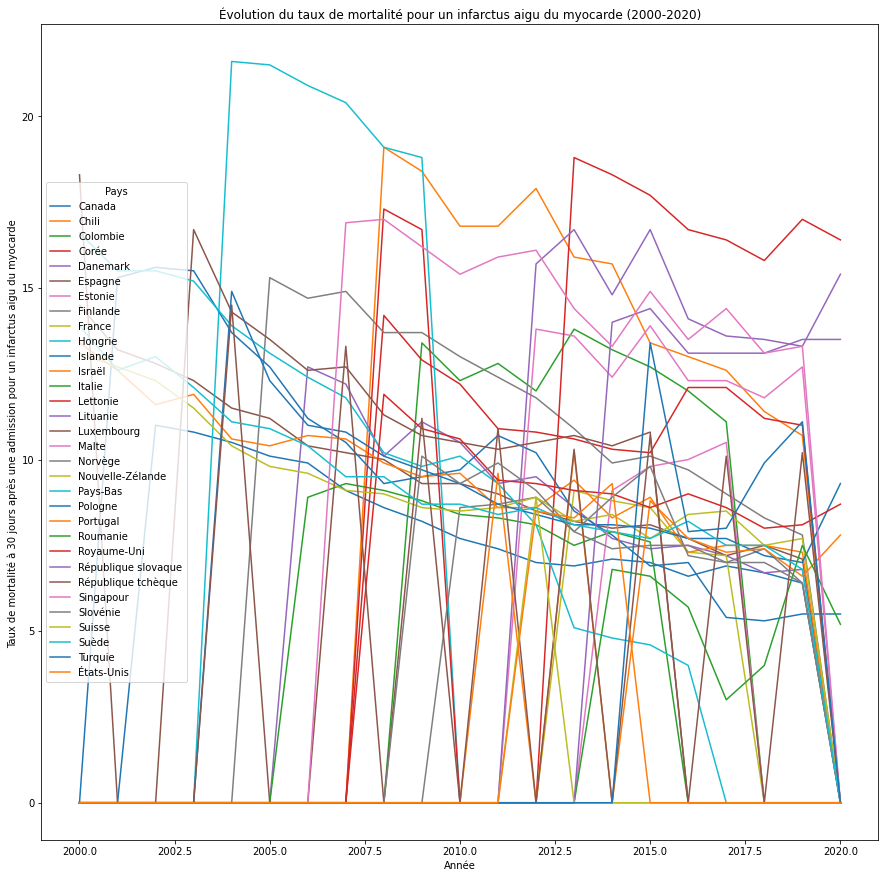

In [143]:
infraT.plot(figsize=(15, 15))
plt.xlabel("Année")
plt.ylabel("Taux de mortalité à 30 jours après une admission pour un infarctus aigu du myocarde ")
plt.title("Évolution du taux de mortalité pour un infarctus aigu du myocarde (2000-2020)")
plt.savefig("img/Évolution du taux de mortalité pour un infarctus aigu du myocarde (2000-2020).png")
plt.show()

### Traitement (regression linéaire, clustering, ...)

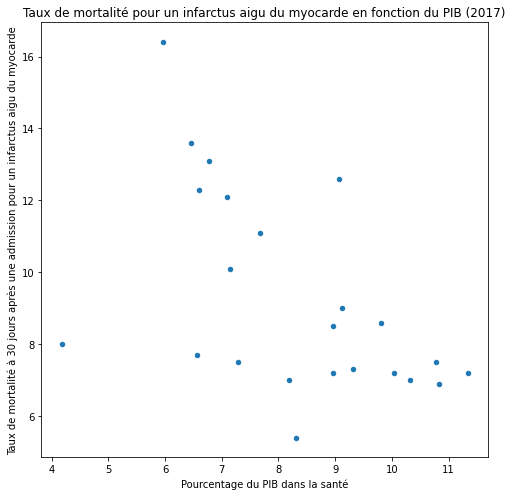

In [144]:
pib_taux_infra = pd.DataFrame({
   'Pourcentage du PIB dans la santé': pib_annee1T.iloc[0],
   "Taux de mortalité à 30 jours après une admission pour un infarctus aigu du myocarde": infra1T.iloc[0]
   })

pib_taux_infra.plot.scatter(x='Pourcentage du PIB dans la santé', y="Taux de mortalité à 30 jours après une admission pour un infarctus aigu du myocarde", figsize=(fig_size, fig_size))
plt.title("Taux de mortalité pour un infarctus aigu du myocarde en fonction du PIB (%d)" % Annee1)
plt.savefig("img/Taux de mortalité pour un infarctus aigu du myocarde en fonction du PIB (%d).png" % Annee1)
plt.show()

#### Regression Line  - taux infarctus

In [145]:
# manip nécessaire, on possède 44 PIB mais que 39 données sur la mortalité prevention, on supprime les pib dont on n'a pas les mortalités
esperance_format_taux_infra_annee1  = esperance_annee1T[esperance_annee1T.columns.intersection(infra1T.columns.values)]
infra1T_format = infra1T[infra1T.columns.intersection(esperance_format_taux_infra_annee1.columns.values)]
esperance_format_taux_infra_annee1


Pays   Canada  Chili  Colombie  Corée  Danemark  Espagne  Estonie  Finlande  \
Année                                                                         
2017     82.0   80.2      76.0   82.7      81.2     83.4     78.2      81.7   

Pays   France  Islande  ...  Norvège  Nouvelle-Zélande  Pologne  Portugal  \
Année                   ...                                                 
2017     82.7     82.7  ...     82.7              81.9     77.9      81.5   

Pays   Royaume-Uni  République slovaque  République tchèque  Slovénie  Suède  \
Année                                                                          
2017          81.3                 77.3                79.1      81.1   82.5   

Pays   Turquie  
Année           
2017      78.1  

[1 rows x 23 columns]

In [146]:
# manip nécessaire, on possède 44 PIB mais que 39 données sur la mortalité prevention, on supprime les pib dont on n'a pas les mortalités
pib_format_taux_infra_annee1  = pib_annee1T[pib_annee1T.columns.intersection(infra1T.columns.values)]
pib_format_taux_infra_annee1

Pays   Canada  Chili  Colombie  Corée  Danemark  Espagne  Estonie  Finlande  \
AnnΘe                                                                         
2017   10.835  9.069     7.679  7.086     10.04    8.957    6.592     9.127   

Pays   France  Islande  ...  Norvège  Nouvelle-Zélande  Pologne  Portugal  \
AnnΘe                   ...                                                 
2017   11.333    8.309  ...   10.316             8.953     6.56     9.306   

Pays   Royaume-Uni  République slovaque  République tchèque  Slovénie   Suède  \
AnnΘe                                                                           
2017         9.808                6.771               7.142     8.185  10.785   

Pays   Turquie  
AnnΘe           
2017      4.18  

[1 rows x 23 columns]

In [147]:
X = esperance_format_taux_infra_annee1.iloc[0].values.reshape(-1,1)
Y = infra1T_format.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

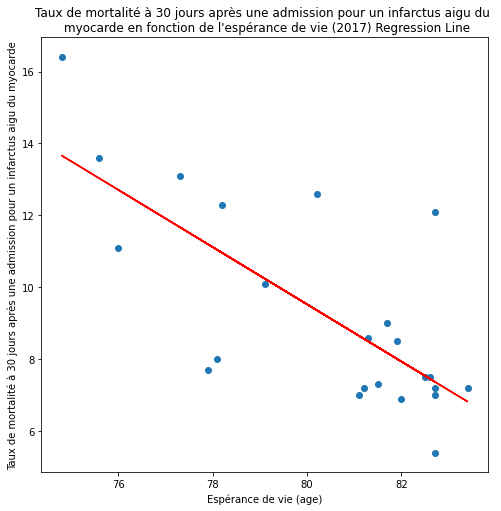

In [148]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Espérance de vie (age)")
plt.ylabel("Taux de mortalité à 30 jours après une admission pour un infarctus aigu du myocarde")

plt.title("Taux de mortalité à 30 jours après une admission pour un infarctus aigu du \n myocarde en fonction de l'espérance de vie (%d) Regression Line" % Annee1)
plt.savefig("img/Taux de mortalité à 30 jours après une admission pour un infarctus aigu du myocarde en fonction de l'espérance de vie (%d) Regression Line.png" % Annee1)
plt.show()

In [149]:
X = pib_format_taux_infra_annee1.iloc[0].values.reshape(-1,1)
Y = infra1T_format.iloc[0].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X)

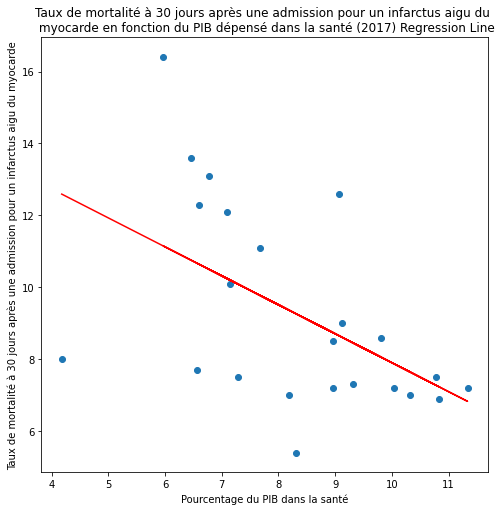

In [150]:
plt.figure(figsize=(fig_size, fig_size))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel("Pourcentage du PIB dans la santé")
plt.ylabel("Taux de mortalité à 30 jours après une admission pour un infarctus aigu du myocarde")

plt.title("Taux de mortalité à 30 jours après une admission pour un infarctus aigu du \n myocarde en fonction du PIB dépensé dans la santé (%d) Regression Line" % Annee1)
plt.savefig("img/Taux de mortalité à 30 jours après une admission pour un infarctus aigu du myocarde en fonction du PIB dépensé dans la santé (%d) Regression Line.png" % Annee1)
plt.show()